### Notebook organization:
  * Executive summary / Abstract 
  * Introduction, motivation and problem statement
  * Parameter interpretation and its descriptive statistics -- Original parameters
  * Preparing data for model taining by joining various data tables
  * Parameter interpretation and its descriptive statistics -- Derived parameters
  * Data imputation
  * Training and testing dataset split
  * Exploratory study on the training dataset
  * Model training
  * Analyzing the results and model comparisons
  * Conclusion

#Predicting Flight Departure Delay using a Scalable Data Mining Approach

Authors: Nathan Nusaputra, Ryan Sawasaki, James Gao, Ankitkumar Patel

Team Number: 29

## Abstract

Flight delays are frequent and growing over time due to the increasing air traffic and uncertainity in the global environment, which cost tens of billions of dollars and introduce inconvenience to passangers. According to the U.S. department of transportation, 15% of the flights are delayed beyond their scheduled departure time. Thus, flight delay prediction is becoming a primary issue for airlines and passengers. The goal of the project is to predict flight departure delay using the historial flight schedules and weather information at the original and destination airports in a scalable manner. We design a data processing and transformation pipeline to analyze and mine 31 million historical flight scheudules and 630 million weather data records using the parallel processing map-reduce algorithm. We extract key flight and weather-related features using extensive exploratory analysis which are used to model flight delay and explain its variability. The decision tree algorithm is used to train a model, which results an accuracy of 84% and recall of 35% on the test dataset. The experimental results demonstrate the accuracy an scalability of the flight prediction task that can be achieved by using distributed computing algorithms like map-reduce and frameworks like PySpark.

## Question Formulation

###Introduction 
For this project we will be predicting flight delays using the 2015-2019 flights data from the Bureau of Transportation Statistics containing over 31 million records on U.S. domestic flights with information on schedules, delays, distance, airports, and airline carriers. In addition, we have the weather statistics from the National Oceanic and Atmospheric Administration that may be able to provide relationships between weather and flight delays. Additional datasets such as a global airport and airport timezone database are also used to assist in joining the airline and weather datasets.

### Motivation

Flight delays have a significant impact for both airlines and passengers. For passengers, delays can result in missed connections and the uncertainty in flights leads to schedule buffers. For airlines, delays result in additional operational costs in addition to the loss of business. In a study conducted by the Federal Aviation Administration, it was concluded the flight delays result in costs to airlines up to $8 billion per year. The study also finds that the costs to passengers is over double that of airlines at over $18 billion per year.(https://www.faa.gov/data_research/aviation_data_statistics/media/cost_delay_estimates.pdf). Given the sheer volume of domestic flights per year, the ability to correctly predict even a small percentage of delays could result in cost savings in the hundreds of millions.

###Objective

To predict flight delay status two hours ahead of the planned departure time. We define flight delay as the difference between the scheduled and actual departure time. A flight status is marked as delayed if the flight delay is more than 15 minutes.

In [0]:
airlines = spark.read.option("header", "true").parquet(f"dbfs:/mnt/mids-w261/datasets_final_project/parquet_airlines_data/201*.parquet")
display(airlines.sample(False, 0.00001))

YEAR QUARTER MONTH DAY_OF_MONTH DAY_OF_WEEK FL_DATE OP_UNIQUE_CARRIER OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN_AIRPORT_SEQ_ID ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_FIPS ORIGIN_STATE_NM ORIGIN_WAC DEST_AIRPORT_ID DEST_AIRPORT_SEQ_ID DEST_CITY_MARKET_ID DEST DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_FIPS DEST_STATE_NM DEST_WAC CRS_DEP_TIME DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 DEP_DELAY_GROUP DEP_TIME_BLK TAXI_OUT WHEELS_OFF WHEELS_ON TAXI_IN CRS_ARR_TIME ARR_TIME ARR_DELAY ARR_DELAY_NEW ARR_DEL15 ARR_DELAY_GROUP ARR_TIME_BLK CANCELLED CANCELLATION_CODE DIVERTED CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME FLIGHTS DISTANCE DISTANCE_GROUP CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY FIRST_DEP_TIME TOTAL_ADD_GTIME LONGEST_ADD_GTIME DIV_AIRPORT_LANDINGS DIV_REACHED_DEST DIV_ACTUAL_ELAPSED_TIME DIV_ARR_DELAY DIV_DISTANCE DIV1_AIRPORT DIV1_AIRPORT_ID DIV1_AIRPORT_SEQ_ID DIV1_WHEELS_ON DIV1_TOTAL_GTIME DIV1_LONGEST_GTIME DIV1_WHEELS_OFF DIV1_TAIL_NUM DIV2_AIRPORT DIV2_AIRPORT_ID DIV2_AIRPORT_SEQ_ID DIV2_WHEELS_ON DIV2_TOTAL_GTIME DIV2_LONGEST_GTIME DIV2_WHEELS_OFF DIV2_TAIL_NUM DIV3_AIRPORT DIV3_AIRPORT_ID DIV3_AIRPORT_SEQ_ID DIV3_WHEELS_ON DIV3_TOTAL_GTIME DIV3_LONGEST_GTIME DIV3_WHEELS_OFF DIV3_TAIL_NUM DIV4_AIRPORT DIV4_AIRPORT_ID DIV4_AIRPORT_SEQ_ID DIV4_WHEELS_ON DIV4_TOTAL_GTIME DIV4_LONGEST_GTIME DIV4_WHEELS_OFF DIV4_TAIL_NUM DIV5_AIRPORT DIV5_AIRPORT_ID DIV5_AIRPORT_SEQ_ID DIV5_WHEELS_ON DIV5_TOTAL_GTIME DIV5_LONGEST_GTIME DIV5_WHEELS_OFF DIV5_TAIL_NUM 2019 2 6 2 7 2019-06-02 DL 19790 DL N321US 2716 11433 1143302 31295 DTW Detroit, MI MI 26 Michigan 43 11278 1127805 30852 DCA Washington, DC VA 51 Virginia 38 2233 2318 45.0 45.0 1.0 3 2200-2259 13.0 2331 28 5.0 2359 33 34.0 34.0 1.0 2 2300-2359 0.0 null 0.0 86.0 75.0 57.0 1.0 405.0 2 6.0 0.0 0.0 0.0 28.0 null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2019 2 6 8 6 2019-06-08 UA 19977 UA N61881 286 12173 1217305 32134 HNL Honolulu, HI HI 15 Hawaii 2 12892 1289208 32575 LAX Los Angeles, CA CA 6 California 91 1231 1226 -5.0 0.0 0.0 -1 1200-1259 18.0 1244 2043 14.0 2111 2057 -14.0 0.0 0.0 -1 2100-2159 0.0 null 0.0 340.0 331.0 299.0 1.0 2556.0 11 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2019 2 6 2 7 2019-06-02 OH 20397 OH N596NN 5168 10693 1069302 30693 BNA Nashville, TN TN 47 Tennessee 54 11057 1105703 31057 CLT Charlotte, NC NC 37 North Carolina 36 1247 1240 -7.0 0.0 0.0 -1 1200-1259 19.0 1259 1449 16.0 1519 1505 -14.0 0.0 0.0 -1 1500-1559 0.0 null 0.0 92.0 85.0 50.0 1.0 328.0 2 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2019 2 6 5 3 2019-06-05 AS 19930 AS N609AS 49 10299 1029906 30299 ANC Anchorage, AK AK 2 Alaska 1 10170 1017004 30070 ADQ Kodiak, AK AK 2 Alaska 1 1515 1505 -10.0 0.0 0.0 -1 1500-1559 15.0 1520 1558 3.0 1610 1601 -9.0 0.0 0.0 -1 1600-1659 0.0 null 0.0 55.0 56.0 38.0 1.0 253.0 2 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 2016 3 8 17 3 2016-08-17 NK 20416 NK N514NK 788 12889 1288903 32211 LAS Las Vegas, NV NV 32 Nevada 85 11433 1143302 31295 DTW Detroit, MI MI 26 Michigan 43 2330 2324 -6.0 0.0 0.0 -1 2300-2359 12.0 2336 6

In [0]:
display(airlines.describe())

summary YEAR QUARTER MONTH DAY_OF_MONTH DAY_OF_WEEK FL_DATE OP_UNIQUE_CARRIER OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN_AIRPORT_SEQ_ID ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_FIPS ORIGIN_STATE_NM ORIGIN_WAC DEST_AIRPORT_ID DEST_AIRPORT_SEQ_ID DEST_CITY_MARKET_ID DEST DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_FIPS DEST_STATE_NM DEST_WAC CRS_DEP_TIME DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 DEP_DELAY_GROUP DEP_TIME_BLK TAXI_OUT WHEELS_OFF WHEELS_ON TAXI_IN CRS_ARR_TIME ARR_TIME ARR_DELAY ARR_DELAY_NEW ARR_DEL15 ARR_DELAY_GROUP ARR_TIME_BLK CANCELLED CANCELLATION_CODE DIVERTED CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME FLIGHTS DISTANCE DISTANCE_GROUP CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY FIRST_DEP_TIME TOTAL_ADD_GTIME LONGEST_ADD_GTIME DIV_AIRPORT_LANDINGS DIV_REACHED_DEST DIV_ACTUAL_ELAPSED_TIME DIV_ARR_DELAY DIV_DISTANCE DIV1_AIRPORT DIV1_AIRPORT_ID DIV1_AIRPORT_SEQ_ID DIV1_WHEELS_ON DIV1_TOTAL_GTIME DIV1_LONGEST_GTIME DIV1_WHEELS_OFF DIV1_TAIL_NUM DIV2_AIRPORT DIV2_AIRPORT_ID DIV2_AIRPORT_SEQ_ID DIV2_WHEELS_ON DIV2_TOTAL_GTIME DIV2_LONGEST_GTIME DIV2_WHEELS_OFF DIV2_TAIL_NUM DIV3_AIRPORT DIV3_AIRPORT_ID DIV3_AIRPORT_SEQ_ID DIV3_WHEELS_ON DIV3_TOTAL_GTIME DIV3_LONGEST_GTIME DIV3_WHEELS_OFF DIV3_TAIL_NUM DIV4_AIRPORT DIV4_AIRPORT_ID DIV4_AIRPORT_SEQ_ID DIV4_WHEELS_ON DIV4_TOTAL_GTIME DIV4_LONGEST_GTIME DIV4_WHEELS_OFF DIV4_TAIL_NUM DIV5_AIRPORT DIV5_AIRPORT_ID DIV5_AIRPORT_SEQ_ID DIV5_WHEELS_ON DIV5_TOTAL_GTIME DIV5_LONGEST_GTIME DIV5_WHEELS_OFF DIV5_TAIL_NUM count 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31674354 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31746841 31274521 31269545 31269545 31269545 31269545 31746841 31260424 31260429 31244917 31244917 31746841 31244919 31176201 31176201 31176201 31176201 31746841 31746841 489947 31746841 31746677 31178799 31178799 31746841 31746841 31746841 5799114 5799114 5799114 5799114 5799114 203262 203260 203260 31746838 78108 66118 66119 78096 81641 81641 81641 81640 81641 81641 66537 66539 687 691 691 687 687 687 277 277 7 7 7 7 7 7 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 mean 2017.1512498204152 2.5174877084620797 6.552106365480585 15.749554640727876 3.9346285509162944 null null 19949.20515190787 null 8806.54128440367 2339.5700956514065 12668.724409461716 1266875.803290192 31729.315288031336 null null null 26.35374732245013 null 54.91906164774001 12668.666651116562 1266870.0274082704 31729.2951808339 null null null 26.354102948384693 null 54.919218135750896 1330.0884999550035 1334.2122192375064 9.855285614165476 12.909587811399238 0.18207943223989986 0.036036885090588944 null 16.830789563186986 1356.9563268309594 1464.4766360877195 7.5604571777227 1488.9034405659447 1468.8957719173475 4.615475952313754 12.966188215170925 0.18601095752494026 -0.20968071125792395 null 0.015432937091284137 null 0.0024603392822611864 143.2167191860742 138.22906985609035 113.8502422431345 1.0 823.2170183483768 3.7652922065537164 19.98459350859459 3.2259498606166392 15.44036813209742 0.08916793151505557 25.364284785572416 1330.4193110369868 37.360331595001476 36.78451244711207 0.003480000118436992 0.8465074000102423 381.64725188299707 234.13669293243998 42.599236836713786 null 12717.885204737815 1271791.6214034616 1509.759015188633 35.31460908122145 28.555541945836037 1540.3529164224417 8805.0 null 12468.658465991317 1246869.2836468886 1384.3318777292577 22.676855895196507 18.86754002911208 1367.2454873646209 null null 13244.285714285714 1324431.4285714286 1475.2857142857142 15.857142857142858 13.428571428571429 853.0 null null null null null null null null null null null null null null null null null stddev 1.4316532810209637 1.1053295681781923 3.3994302561415313 8.774238088354524 1.9917635387471753 null null 383.19196153196094 nul

In [0]:
weather = spark.read.option("header", "true")\
                    .parquet(f"dbfs:/mnt/mids-w261/datasets_final_project/weather_data/*.parquet")

f'{weather.count():,}'

Out[25]: '630,904,436'

In [0]:
display(weather.sample(False, 0.000001).describe())

summary STATION SOURCE LATITUDE LONGITUDE ELEVATION NAME REPORT_TYPE CALL_SIGN QUALITY_CONTROL WND CIG VIS TMP DEW SLP AW1 GA1 GA2 GA3 GA4 GE1 GF1 KA1 KA2 MA1 MD1 MW1 MW2 OC1 OD1 OD2 REM EQD AW2 AX4 GD1 AW5 GN1 AJ1 AW3 MK1 KA4 GG3 AN1 RH1 AU5 HL1 OB1 AT8 AW7 AZ1 CH1 RH3 GK1 IB1 AX1 CT1 AK1 CN2 OE1 MW5 AO1 KA3 AA3 CR1 CF2 KB2 GM1 AT5 AY2 MW6 MG1 AH6 AU2 GD2 AW4 MF1 AA1 AH2 AH3 OE3 AT6 AL2 AL3 AX5 IB2 AI3 CV3 WA1 GH1 KF1 CU2 CT3 SA1 AU1 KD2 AI5 GO1 GD3 CG3 AI1 AL1 AW6 MW4 AX6 CV1 ME1 KC2 CN1 UA1 GD5 UG2 AT3 AT4 GJ1 MV1 GA5 CT2 CG2 ED1 AE1 CO1 KE1 KB1 AI4 MW3 KG2 AA2 AX2 AY1 RH2 OE2 CU3 MH1 AM1 AU4 GA6 KG1 AU3 AT7 KD1 GL1 IA1 GG2 OD3 UG1 CB1 AI6 CI1 CV2 AZ2 AD1 AH1 WD1 AA4 KC1 IA2 CF3 AI2 AT1 GD4 AX3 AH4 KB3 CU1 CN4 AT2 CG1 CF1 GG1 MV2 CW1 GG4 AB1 AH5 CN3 count 624 552 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 627 mean 6.03317036968871E10 4.911231884057971 36.144261670015936 -37.49694685773525 371.68178628389165 null null 99999.0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null stddev 3.1776372196684196E10 1.3476135809478413 23.439222046048272 81.06893537587904 527.9814328804116 null null 0.0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null min 1001099999 4 -71.8833333 -166.14667 0.9 CRN05 99999 V020 010,1,N,0010,1 00000,1,9,N 000402,5,N,5 +0000,1 +0000,1 09862,1 max A0688400416 7 78.65 171.2 3407.4 ZHULIANY INTERNATIONAL, UP SOM PGUM V030 999,9,V,0031,5 99999,9,C,N 999999,9,N,5 -0260,1 -0284,1 99999,9 91,1 99,9,+99999,9,07,1 99,9,+99999,9,10,1 99,9,+99999,9,10,1 99,9,+07500,1,09,1 9,MSL ,+99999,+99999 99,99,9,99,9,99,9,04572,1,99,9,99,9 240,N,-0145,1 240,N,-0172,1 99999,9,10256,1 9,9,999,9,-017,1 80,1 51,1 0201,1 5,99,0118,1,999 5,99,0080,1,999 SYN11206792 03/// /2001 11128 21140 38266 48496 52010 69912 333 21145 3/118 55009 55300 20000 600

##Feature Engineering and Join

To join the weather data and the airlines data we will be using the departure time - 2 hours and the weather station code as the primary key to join with the weather time stamp and the weather station. The first step is to assign each airport to its closest weather code. In addition, the departure time will need to be converted from the timezone time to the weather's utc time.

The first challenge we faced when trying to join the datasets is that the weather data is located by weather stations while the key for airlines data is the airport code. We determined that the longtitude and latitude is the best way to join these two data sets. To assist in joining the datasets an external database with longtitude and latitudes for each of the airports was used (https://www.partow.net/miscellaneous/airportdatabase/). The weather data already had the longtitiude and latitude within the data set so no additional steps were performed. The next step was calculating the haversine distance which is the angular distance between two points would help us determine which weather station was the closest to each airport. We performed a cross join and ranked each row by ascending order based on distance and finally filtered for only rank "1". Below we show the final output and the Haversine calculation.

In [0]:
# # formula for haversine distance calculation found here:
# # https://stackoverflow.com/questions/60086180/pyspark-how-to-apply-a-python-udf-to-pyspark-dataframe-columns

# from pyspark.sql.functions import col, radians, asin, sin, sqrt, cos

# airports_and_stations_exploded_with_distance = airports_and_stations_exploded.withColumn("dlon", radians(col("longitude_decimal_degrees")) - radians(col("LONGITUDE"))) \
#                                                                              .withColumn("dlat", radians(col("latitude_decimal_degrees")) - radians(col("LATITUDE"))) \
#                                                                              .withColumn("haversine_dist", asin(sqrt(
#                                                                                                                      sin(col("dlat") / 2) ** 2 + cos(radians(col("LATITUDE")))
#                                                                                                                      * cos(radians(col("latitude_decimal_degrees"))) * sin(col("dlon") / 2) ** 2
#                                                                                                                      )
#                                                                                                                 ) * 2 * 3963 * 5280) \
#                                                                              .drop("dlon", "dlat")

# airports_and_stations_exploded_with_distance.createOrReplaceTempView('airports_and_stations_exploded_with_distance')

In [0]:
# Table showing the final output
airport_weather_station_key = spark.read.option("header", "true").parquet(f"dbfs:/user/nathan.nusaputra@ischool.berkeley.edu/FINAL_PROJECT/airport_weather_station_key")
airport_weather_station_key.createOrReplaceTempView('airport_weather_station_key')
test = 'SELECT station_id, station_latitude, station_longitude, airport_code, airport_latitude, airport_longitude, haversine_dist_feet FROM airport_weather_station_key'
display(sqlContext.sql(test))

station_id station_latitude station_longitude airport_code airport_latitude airport_longitude haversine_dist_feet 72512614736 40.29639 -78.32028 AOO 40.296 -78.32 161.96709662798654 84752099999 -16.341072 -71.583083 AQP -16.341 -71.583 39.26067867327079 72219013874 33.6301 -84.4418 ATL 33.64 -84.427 5772.012020316871 72228013876 33.56556 -86.745 BHM 33.563 -86.753 2607.411638777335 96441099999 3.12385 113.020472 BTU 3.172 113.044 19565.70347813837 83208099999 -12.694375 -60.098269 BVH -12.694 -60.098 167.16911411449553 16020099999 46.460194 11.326383 BZO 46.461 11.326 309.19762061213015 59287099999 23.392436 113.298786 CAN 23.184 113.266 76912.07784504181 72268793033 32.3335 -104.258 CNM 32.337 -104.263 2004.0970468710366 15450099999 44.318139 23.888611 CRA 44.318 23.889 113.47095229158748 3901099999 54.3333333 -7.6 ENK 54.399 -7.652 26410.308178022784 87803099999 -42.90795 -71.139472 EQS -42.908 -71.139 127.63633782073462 74783012849 26.07875 -80.16217 FLL 26.072 -80.153 3889.032685899625 3628099999 51.5166666 -2.5833333 FZO 51.519 -2.591 1939.7150010661185 11240099999 46.991067 15.439628 GRZ 47.0 15.433 3656.3688806687346 2604099999 56.691128 12.820211 HAD 56.691 12.82 62.58557754989769 74777003852 30.41667 -86.68333 HRT 30.428 -86.689 4506.803576623632 15090099999 47.178492 27.620631 IAS 47.179 27.62 242.90817811615483 65100099999 7.362458 3.978333 IBA 7.362 3.978 206.23233270308992 30710099999 52.268028 104.388975 IKT 52.267 104.395 1397.3642382009195 48357099999 17.4166666 104.7833333 KOP 17.412 104.777 2788.1144695779944 48071099999 19.4166666 93.55 KYP 19.427 93.534 6680.051824947494 7621099999 43.178675 -0.006439 LDE 43.179 -0.006 166.823905529044 86840099999 -21.667 -49.733 LIP -21.664 -49.73 1495.9248977567734 16597099999 35.857497 14.4775 MLA 35.857 14.478 234.57692614154783 67241099999 -15.033058 40.671728 MNC -14.488 40.712 199564.77884562255 63330099999 13.467367 39.533464 MQX 13.467 39.533 212.15576084446428 3797035047 51.35 1.333 MSE 51.342 1.346 4163.151023042945 42916099999 20.4166666 72.85 NMB 20.435 72.844 7002.879272318463 78793099999 8.391003 -82.434992 OTR 8.601 -82.97 207905.0918074239 42492099999 25.591317 85.087992 PAT 25.591 85.088 115.92834171726388 83914099999 -28.243989 -52.326558 PFB -28.244 -52.326 179.49342391668733 99768799999 40.08 -74.88 PNE 40.082 -75.011 36613.093316740364 96581099999 -0.150711 109.403892 PNK -0.151 109.404 112.58492637087842 80342099999 1.392844 -77.290822 PSO 1.396 -77.291 1154.4316639489577 85289099999 -18.975281 -57.820586 PSZ -18.975 -57.821 175.67383953474032 40719099999 37.325431 49.605708 RAS 37.325 49.606 178.40859736819291 85043099999 -11.0166667 -66.1166667 RIB -11.01 -66.073 15842.433877365249 72483023232 38.5069 -121.495 SAC 38.513 -121.493 2300.333860854827 96179099999 -0.479189 104.579283 SIQ -0.479 104.579 123.55665428948512 97502099999 -0.926358 131.121194 SOQ -0.926 131.12 456.8858163401035 37279099999 42.5166666 41.8833333 SUI 42.858 41.128 238020.33997784482 60459299999 35.533 -0.533 TAF 35.542 -0.532 3300.1754166091787 91336099999 6.8833333 152.7166667 TKK 7.462 151.843 380625.4588135329 60680599999 22.8 5.45 TMR 22.811 5.451 4031.6299007185585 4270099999 61.160517 -45.425978 UAK 61.161 -45.427 251.63101772363515 72402093739 37.93718 -75.46629 WAL 37.94 -75.466 1032.6775145257502 10126099999 53.547833 7.667333 WVN 53.505 8.053 85175.49662377409 71642099999 47.82 -83.346667 YLD 47.82 -83.346 163.39747492227917 71864099999 50.330278 -105.559167 YMJ 50.33 -105.559 108.27123978293443 71799099999 48.646944 -123.425833 YYJ 48.647 -123.426 45.62319671292001 85151099999 -14.7333333 -68.4166667 APB -14.739 -68.411 2878.3046780815425 6104099999 55.740322 9.151778 BLL 55.74 9.152 125.60284713642226 85223099999 -17.421058 -66.177114 CBB -17.421 -66.177 44.5013668955341 72466093037 38.81 -104.6884 COS 38.806 -104.7 3609.2048264078526 84239099999 -2.889467 -78.984397 CUE -2.889 -78.984 223.47297925493217 63894099999 -6.878111 39.202625 DAR -6.878 39.203 141.59555151

Map of Airports and Weather Station

<img src ="https://raw.githubusercontent.com/nnusaputra/Machine-Learning-At-Scale/master/airport%20and%20weather%20station%20map.png?token=AOGDNAQFPUDNTFXJ4LBVAJK73U3GS">

After applying data imputation, most of the fields are populated with data and we have only 0.03% of airport codes are missing in the table.

In [0]:
airport_weather_station_key.count()

Out[20]: 2911

In [0]:
airport_weather_station_key.select([(count(when(isnan(c) | col(c).isNull(), c))/airport_weather_station_key.count()).alias(c) for c in airport_weather_station_key.columns if c not in [""]]).toPandas().head()

Out[11]:

station_id 
 station_name 
 station_latitude 
 station_longitude 
 airport_code 
 airport_name 
 airport_city 
 airport_country 
 airport_latitude 
 airport_longitude 
 haversine_dist_feet 
 
 
 
 
 0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.000344 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0

The second challenge we faced is to pull together the airlines and weather datasets. Given that the airlines data only provides local departure time, we needed to convert the times to UTC for consistency. We first created a UDF to convert the local time to a timestamp. With the help of an outside database (https://openflights.org/data.html), we were able to assign timezones to airports based on their respective IATA codes. Using the pytz library along with the timezones we were able to convert the airport departure times from local to UTC time.

In [0]:
# read in and set airport_timezones dataset to variable airport_tz
airport_tz = spark.read.option("header", "true").parquet(f"dbfs:/user/nathan.nusaputra@ischool.berkeley.edu/FINAL_PROJECT/airport_timezones")
airport_tz.createOrReplaceTempView('airport_tz')
display(airport_tz)

id name city country IATA ICAO lat long UTC_offset timezone 3212 Barter Island LRRS Airport Barter Island United States BTI PABA 70.13400269 -143.5820007 -9 America/Anchorage 3213 Wainwright Air Station Fort Wainwright United States \N PAWT 70.61340332 -159.8600006 -9 America/Anchorage 3214 Cape Lisburne LRRS Airport Cape Lisburne United States LUR PALU 68.87509918 -166.1100006 -9 America/Anchorage 3215 Point Lay LRRS Airport Point Lay United States PIZ PPIZ 69.73290253 -163.0050049 -9 America/Anchorage 3216 Hilo International Airport Hilo United States ITO PHTO 19.72139931 -155.0480042 -10 Pacific/Honolulu 3217 Orlando Executive Airport Orlando United States ORL KORL 28.5455 -81.332901 -5 America/New_York 3218 Bettles Airport Bettles United States BTT PABT 66.91390228 -151.529007 -9 America/Anchorage 3219 Clear Airport Clear Mews United States \N PACL 64.301201 -149.119995 -9 America/Anchorage 3220 Indian Mountain LRRS Airport Indian Mountains United States UTO PAIM 65.99279785 -153.7039948 -9 America/Anchorage 3221 Fort Yukon Airport Fort Yukon United States FYU PFYU 66.57150269 -145.25 -9 America/Anchorage 3222 Sparrevohn LRRS Airport Sparrevohn United States SVW PASV 61.09740067 -155.5740051 -9 America/Anchorage 3223 Bryant Army Heliport Fort Richardson United States FRN PAFR 61.26639938 -149.6529999 -9 America/Anchorage 3224 Tatalina LRRS Airport Tatalina United States TLJ PATL 62.89440155 -155.977005 -9 America/Anchorage 3225 Cape Romanzof LRRS Airport Cape Romanzof United States CZF PACZ 61.78030014 -166.0390015 -9 America/Anchorage 3226 Laurence G Hanscom Field Bedford United States BED KBED 42.47000122 -71.28900146 -5 America/New_York 3227 St Paul Island Airport St. Paul Island United States SNP PASN 57.16730118 -170.2200012 -9 America/Anchorage 3228 Cape Newenham LRRS Airport Cape Newenham United States EHM PAEH 58.64640045 -162.0630035 -9 America/Anchorage 3229 St George Airport Point Barrow United States STG PAPB 56.57830048 -169.6620026 -9 America/Anchorage 3230 Iliamna Airport Iliamna United States ILI PAIL 59.75439835 -154.9109955 -9 America/Anchorage 3231 Platinum Airport Port Moller United States PTU PAPM 59.01139832 -161.8200073 -9 America/Anchorage 3232 Big Mountain Airport Big Mountain United States BMX PABM 59.36119843 -155.2590027 -9 America/Anchorage 3233 Oscoda Wurtsmith Airport Oscoda United States OSC KOSC 44.451599 -83.394096 -5 America/New_York 3234 Marina Municipal Airport Fort Ord United States OAR KOAR 36.68190002 -121.762001 -8 America/Los_Angeles 3235 Sacramento Mather Airport Sacramento United States MHR KMHR 38.55390167 -121.2979965 -8 America/Los_Angeles 3236 Bicycle Lake Army Air Field Fort Irwin United States BYS KBYS 35.2804985 -116.6299973 -8 America/Los_Angeles 3237 Twentynine Palms (Self) Airport Twenty Nine Palms United States \N KNXP 34.2961998 -116.1620026 -8 America/Los_Angeles 3238 Fort Smith Regional Airport Fort Smith United States FSM KFSM 35.33660126 -94.36740112 -6 America/Chicago 3239 Merrill Field Anchorage United States MRI PAMR 61.21350098 -149.8439941 -9 America/Anchorage 3240 Grants-Milan Municipal Airport Grants United States GNT KGNT 35.16730118 -107.9020004 -7 America/Denver 3241 Ponca City Regional Airport Ponca City United States PNC KPNC 36.73199844 -97.09980011 -6 America/Chicago 3242 Hunter Army Air Field Hunter Aaf United States SVN KSVN 32.00999832 -81.14569855 -5 America/New_York 3243 Grand Forks International Airport Grand Forks United States GFK KGFK 47.949299 -97.176102 -6 America/Chicago 3244 Pine Bluff Regional Airport, Grider Field Pine Bluff United States PBF KPBF 34.1731 -91.9356 -6 America/Chicago 3245 Whiting Field Naval Air Station - North Milton United States NSE KNSE 30.7241993 -87.02189636 -6 America/Chicago 3246 Hana Airport Hana United States HNM PHHN 20.79560089 -156.0140076 -10 Pacific/Honolulu 3247 Ernest A. Love Field Prescott United States PRC KPRC 34.65449905 -112.4199982 -7 America/Phoenix 3248 Trenton Mercer Airport Trenton United Stat

In [0]:
# # Convert the date and time in the airlines dataset to timestamps

# # UDF for converting year, month, day to timestamps
# def create_datetime_from_parts(year, month, day, local_time):
#     time = str(local_time)
#     num_str = time.zfill(4)
#     hour = num_str[0:2]
#     min = num_str[2:4]
#     return f'{year}-{month}-{day} {hour}:{min}:0'

# # Apply UDF to create column for local departure time
# create_datetime_udf = f.udf(create_datetime_from_parts, types.StringType())
# airlines_with_localtime = airlines_with_weather_station.withColumn("LOCAL_DEP_TIME", create_datetime_udf('YEAR', 'MONTH', 'DAY_OF_MONTH','CRS_DEP_TIME').cast(types.TimestampType()))

# # join airlines dataset with timezone dataset. join based on departure airport 'ORIGIN' and airport 'IATA'
# airlines_with_timezone = airlines_with_localtime.join(f.broadcast(airport_tz), airport_tz.IATA==airlines_with_localtime.ORIGIN, 'inner')

# # use the spark built-in function to convert the local time to UTC time based on timezone
# airlines_with_utc = airlines_with_timezone.withColumn("UTC_DEP_TIME",to_utc_timestamp(col("LOCAL_DEP_TIME"), col("timezone")))

Here is our final airlines with weather station and UTC departure time to be joined with the weather data set.

In [0]:
# read in airlines_with_weather_station_utc_dep
airlines_with_weather_station_utc_dep = spark.read.option("header", "true").parquet(f"dbfs:/user/nathan.nusaputra@ischool.berkeley.edu/FINAL_PROJECT/airlines_with_weather_station_utc_dep")
airlines_with_weather_station_utc_dep.createOrReplaceTempView('airlines_with_weather_station_utc_dep')
display(airlines_with_weather_station_utc_dep)
airlines_with_weather_station_utc_dep.count()

YEAR QUARTER MONTH DAY_OF_MONTH DAY_OF_WEEK FL_DATE OP_UNIQUE_CARRIER OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN_AIRPORT_SEQ_ID ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_FIPS ORIGIN_STATE_NM ORIGIN_WAC DEST_AIRPORT_ID DEST_AIRPORT_SEQ_ID DEST_CITY_MARKET_ID DEST DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_FIPS DEST_STATE_NM DEST_WAC CRS_DEP_TIME DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 DEP_DELAY_GROUP DEP_TIME_BLK TAXI_OUT WHEELS_OFF WHEELS_ON TAXI_IN CRS_ARR_TIME ARR_TIME ARR_DELAY ARR_DELAY_NEW ARR_DEL15 ARR_DELAY_GROUP ARR_TIME_BLK CANCELLED CANCELLATION_CODE DIVERTED CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME FLIGHTS DISTANCE DISTANCE_GROUP CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY FIRST_DEP_TIME TOTAL_ADD_GTIME LONGEST_ADD_GTIME DIV_AIRPORT_LANDINGS DIV_REACHED_DEST DIV_ACTUAL_ELAPSED_TIME DIV_ARR_DELAY DIV_DISTANCE DIV1_AIRPORT DIV1_AIRPORT_ID DIV1_AIRPORT_SEQ_ID DIV1_WHEELS_ON DIV1_TOTAL_GTIME DIV1_LONGEST_GTIME DIV1_WHEELS_OFF DIV1_TAIL_NUM DIV2_AIRPORT DIV2_AIRPORT_ID DIV2_AIRPORT_SEQ_ID DIV2_WHEELS_ON DIV2_TOTAL_GTIME DIV2_LONGEST_GTIME DIV2_WHEELS_OFF DIV2_TAIL_NUM DIV3_AIRPORT DIV3_AIRPORT_ID DIV3_AIRPORT_SEQ_ID DIV3_WHEELS_ON DIV3_TOTAL_GTIME DIV3_LONGEST_GTIME DIV3_WHEELS_OFF DIV3_TAIL_NUM DIV4_AIRPORT DIV4_AIRPORT_ID DIV4_AIRPORT_SEQ_ID DIV4_WHEELS_ON DIV4_TOTAL_GTIME DIV4_LONGEST_GTIME DIV4_WHEELS_OFF DIV4_TAIL_NUM DIV5_AIRPORT DIV5_AIRPORT_ID DIV5_AIRPORT_SEQ_ID DIV5_WHEELS_ON DIV5_TOTAL_GTIME DIV5_LONGEST_GTIME DIV5_WHEELS_OFF DIV5_TAIL_NUM origin_station_id origin_station_name origin_station_latitude origin_station_longitude origin_airport_latitude origin_airport_longitude origin_haversine_distance_feet destination_station_id destination_station_name destination_station_latitude destination_station_longitude destination_airport_latitude destination_airport_longitude haversine_dist_feet LOCAL_DEP_TIME timezone UTC_DEP_TIME 2019 2 4 5 5 2019-04-05 NK 20416 NK N646NK 779 12953 1295304 31703 LGA New York, NY NY 36 New York 22 11697 1169706 32467 FLL Fort Lauderdale, FL FL 12 Florida 33 2014 2025 11.0 11.0 0.0 0 2000-2059 27.0 2052 2318 8.0 2322 2326 4.0 4.0 0.0 0 2300-2359 0.0 null 0.0 188.0 181.0 146.0 1.0 1076.0 5 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 72505394728 NY CITY CENTRAL PARK, NY US 40.77898 -73.96925 40.777 -73.872 26903.66452687644 74783012849 FORT LAUDERDALE INTERNATIONAL AIRPORT, FL US 26.07875 -80.16217 26.072 -80.153 3889.032685899625 2019-04-05T20:14:00.000+0000 America/New_York 2019-04-06T00:14:00.000+0000 2019 2 4 6 6 2019-04-06 NK 20416 NK N615NK 779 12953 1295304 31703 LGA New York, NY NY 36 New York 22 11697 1169706 32467 FLL Fort Lauderdale, FL FL 12 Florida 33 2014 2003 -11.0 0.0 0.0 -1 2000-2059 12.0 2015 2236 20.0 2322 2256 -26.0 0.0 0.0 -2 2300-2359 0.0 null 0.0 188.0 173.0 141.0 1.0 1076.0 5 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 72505394728 NY CITY CENTRAL PARK, NY US 40.77898 -73.96925 40.777 -73.872 26903.66452687644 74783012849 FORT LAUDERDALE INTERNATIONAL AIRPORT, FL US 26.07875 -80.16217 26.072 -80.153 3889.032685899625 2019-04-06T20:14:00.000+0000 America/New_York 2019-04-07T00:14:00.000+0000 2019 2 4 7 7 2019-04-07 NK 20416 NK N633NK 779 12953 1295304 31703 LGA New York, NY NY 36 New York 22 11697 1169706 32467 FLL Fort Lauderdale, FL FL 12 Florida 33 2014 2006 -8.0 0.0 0.0 -1 2000-2059 18.0 2024 2252 16.0 2322 2308 -14.0 0.0 0.0 -1 2300-2359 0.0 null 0.0 188.0 182.0 148.0 1.0 1076.0 5 null null null null null null null null 0 nul

Out[3]: 31573695

### Feature Engineering

Research of literature provided background knowledge of the causes of flight delays. One article examined the effects of delay propagation (https://github.com/UCB-w261/main/blob/master/Assignments/Final%20Project/airline-delays-literature/1703.06118.pdf) Delay propogation suggests that once a flight leg is delayed it could likely result in a chain effect of departure delays. Creating this variable could prove to be useful in determining delayed flights.

The steps to create the new variable goes as follows:

1. Partition by tail number and order by UTC departure time
2. Create column "PREV_UTC_DEP_TIME" that has the previous flight leg UTC departure time
3. Create column "DEP_TIME_DIFF" that calculates the time difference between the previous departure time and the current departure time, in hours. This time difference must be greater than 2 hours because we can only use data that we have access to 2 hours prior to departure. 
4. To account for changes in day the DEP_TIME_DIFF must be less than 7.5 hours. First flights in the morning are usually not impacted by the last flight from the night before. 
5. Create column "PREV_DEP_DEL15" that denotes if the previous flight leg departure was delayed by 15 minutes or more. When the time difference between departures is between 2 and 7.5 hours, "PREV_DEP_DEL15" is equal to the previous flight leg's "DEP_DEL15". Else, "PREV_DEP_DEL15" is set to 0.

In [0]:
# Remove the rows with nulls in the DEP_DEL15 column (should remove 474,582 records)
airlines_with_weather_station_remove_nulls = airlines_with_weather_station_utc_dep.filter(airlines_with_weather_station_utc_dep.DEP_DEL15.isNotNull())

In [0]:
# import functions
from pyspark.sql import functions as F
from pyspark.sql.functions import col, lag, hour, when
from pyspark.sql.window import Window

# create window that partitions on tail number and orders by UTC departure time
my_window = Window.partitionBy("TAIL_NUM").orderBy('UTC_DEP_TIME')

# create column PREV_UTC_DEP_TIME for previous flight leg UTC departure time
# create column DEP_TIME_DIFF to calculate difference (in hours) between current departure time and previous departure time
# create column PREV_DEP_DEL15 to denote if the previous flight was delayed 15 minutes (DEP_DEL15 = 1) given that DEP_TIME DIFF is between 2 and 7.5 hours
airports_and_stations_with_prev_del15 = airlines_with_weather_station_remove_nulls.withColumn("PREV_UTC_DEP_TIME", F.lag(col('UTC_DEP_TIME')).over(my_window)) \
                                       .withColumn("DEP_TIME_DIFF", ((col("UTC_DEP_TIME").cast("long") - col("PREV_UTC_DEP_TIME").cast("long"))/3600)) \
                                       .fillna({'DEP_TIME_DIFF': 0 }) \
                                       .withColumn("PREV_DEP_DEL15", when((col("DEP_TIME_DIFF") >= 2) & (col("DEP_TIME_DIFF") <= 7.5), F.lag(col("DEP_DEL15")).over(my_window))                                                                                      .otherwise(0))

# display dataframe
display(airports_and_stations_with_prev_del15)
airports_and_stations_with_prev_del15.count()


YEAR QUARTER MONTH DAY_OF_MONTH DAY_OF_WEEK FL_DATE OP_UNIQUE_CARRIER OP_CARRIER_AIRLINE_ID OP_CARRIER TAIL_NUM OP_CARRIER_FL_NUM ORIGIN_AIRPORT_ID ORIGIN_AIRPORT_SEQ_ID ORIGIN_CITY_MARKET_ID ORIGIN ORIGIN_CITY_NAME ORIGIN_STATE_ABR ORIGIN_STATE_FIPS ORIGIN_STATE_NM ORIGIN_WAC DEST_AIRPORT_ID DEST_AIRPORT_SEQ_ID DEST_CITY_MARKET_ID DEST DEST_CITY_NAME DEST_STATE_ABR DEST_STATE_FIPS DEST_STATE_NM DEST_WAC CRS_DEP_TIME DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15 DEP_DELAY_GROUP DEP_TIME_BLK TAXI_OUT WHEELS_OFF WHEELS_ON TAXI_IN CRS_ARR_TIME ARR_TIME ARR_DELAY ARR_DELAY_NEW ARR_DEL15 ARR_DELAY_GROUP ARR_TIME_BLK CANCELLED CANCELLATION_CODE DIVERTED CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME FLIGHTS DISTANCE DISTANCE_GROUP CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY FIRST_DEP_TIME TOTAL_ADD_GTIME LONGEST_ADD_GTIME DIV_AIRPORT_LANDINGS DIV_REACHED_DEST DIV_ACTUAL_ELAPSED_TIME DIV_ARR_DELAY DIV_DISTANCE DIV1_AIRPORT DIV1_AIRPORT_ID DIV1_AIRPORT_SEQ_ID DIV1_WHEELS_ON DIV1_TOTAL_GTIME DIV1_LONGEST_GTIME DIV1_WHEELS_OFF DIV1_TAIL_NUM DIV2_AIRPORT DIV2_AIRPORT_ID DIV2_AIRPORT_SEQ_ID DIV2_WHEELS_ON DIV2_TOTAL_GTIME DIV2_LONGEST_GTIME DIV2_WHEELS_OFF DIV2_TAIL_NUM DIV3_AIRPORT DIV3_AIRPORT_ID DIV3_AIRPORT_SEQ_ID DIV3_WHEELS_ON DIV3_TOTAL_GTIME DIV3_LONGEST_GTIME DIV3_WHEELS_OFF DIV3_TAIL_NUM DIV4_AIRPORT DIV4_AIRPORT_ID DIV4_AIRPORT_SEQ_ID DIV4_WHEELS_ON DIV4_TOTAL_GTIME DIV4_LONGEST_GTIME DIV4_WHEELS_OFF DIV4_TAIL_NUM DIV5_AIRPORT DIV5_AIRPORT_ID DIV5_AIRPORT_SEQ_ID DIV5_WHEELS_ON DIV5_TOTAL_GTIME DIV5_LONGEST_GTIME DIV5_WHEELS_OFF DIV5_TAIL_NUM origin_station_id origin_station_name origin_station_latitude origin_station_longitude origin_airport_latitude origin_airport_longitude origin_haversine_distance_feet destination_station_id destination_station_name destination_station_latitude destination_station_longitude destination_airport_latitude destination_airport_longitude haversine_dist_feet LOCAL_DEP_TIME timezone UTC_DEP_TIME PREV_UTC_DEP_TIME DEP_TIME_DIFF PREV_DEP_DEL15 2015 1 1 1 4 2015-01-01 US 20355 US N102UW 1882 12953 1295302 31703 LGA New York, NY NY 36 New York 22 11057 1105703 31057 CLT Charlotte, NC NC 37 North Carolina 36 959 951 -8.0 0.0 0.0 -1 0900-0959 17.0 1008 1140 6.0 1206 1146 -20.0 0.0 0.0 -2 1200-1259 0.0 null 0.0 127.0 115.0 92.0 1.0 544.0 3 null null null null null null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 72505394728 NY CITY CENTRAL PARK, NY US 40.77898 -73.96925 40.777 -73.872 26903.66452687644 72314013881 CHARLOTTE DOUGLAS AIRPORT, NC US 35.2236 -80.9552 35.214 -80.943 5053.448905748063 2015-01-01T09:59:00.000+0000 America/New_York 2015-01-01T14:59:00.000+0000 null 0.0 0.0 2015 1 1 1 4 2015-01-01 US 20355 US N102UW 713 11057 1105703 31057 CLT Charlotte, NC NC 37 North Carolina 36 13487 1348702 31650 MSP Minneapolis, MN MN 27 Minnesota 63 1120 1242 82.0 82.0 1.0 5 1100-1159 11.0 1253 1425 8.0 1304 1433 89.0 89.0 1.0 5 1300-1359 0.0 null 0.0 164.0 171.0 152.0 1.0 930.0 4 82.0 0.0 7.0 0.0 0.0 null null null 0 null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null null 72314013881 CHARLOTTE DOUGLAS AIRPORT, NC US 35.2236 -80.9552 35.214 -80.943 5053.448905748063 72658414927 ST. PAUL DOWNTOWN AIRPORT, MN US 44.9322 -93.0558 44.88 -93.217 45847.9827500048 2015-01-01T11:20:00.000+0000 America/New_York 2015-01-01T16:20:00.000+0000 2015-01-01T14:59:00.000+0000 1.35 0.0 2015 1 1 1 4 2015-01-01 US 20355 US N102UW 1840 13487 1348702 31650 MSP Minneapolis, MN MN 27 Minnesota 63 11057 1105703 31057 CLT Charlotte, NC NC 37 North Carolina 36 1350 1511 81.0 81.0 1.0 5 1300-1359 12.0 1523 1813 11.0 1714 1824 70.0 70.0 1.0 4 1700-1759 0.0 null 0.0 14

Out[5]: 31099113

### Exploratory Data Analysis

In this section, the given airline and weather data are analyzed to identify the features correlated with the target variable 'DEP_DEL15'. 'DEP_DEL15' is a binary variable, where value 1 indicates that a flight was delayed by more than 15 minutes from its scheduled departure time and value 0 indicates that a flight departed at the scheduled time. In the given dataset, 18% of flights were delayed more than 15 minutes while 82% of flights were ontime. Thus, the given data is imbalanced in terms of binary classes. In the given dataset, most of the fields for the airline schedules and airports have no missing data; however, we couldn't find weather station information for the 5.5% of the airports.

In [0]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from pyspark.sql.functions import isnan, when, count, col

In [0]:
pydf = airports_and_stations_with_prev_del15.sample(False, 0.01)
df = pydf.toPandas()
print(f" The fraction of flights delayed more than 15 minutes is {np.mean(df['DEP_DEL15'])} and the fraction of flights on schedule is {1-np.mean(df['DEP_DEL15'])}")

The fraction of flights delayed more than 15 minutes is 0.18187179676206533 and the fraction of flights on schedule is 0.8181282032379347

In [0]:
pydf.select([(count(when(isnan(c) | col(c).isNull(), c))/pydf.count()).alias(c) for c in pydf.columns if c not in ["LOCAL_DEP_TIME", "UTC_DEP_TIME", "PREV_UTC_DEP_TIME"]]).toPandas().head()

Out[8]:

YEAR 
 QUARTER 
 MONTH 
 DAY_OF_MONTH 
 DAY_OF_WEEK 
 FL_DATE 
 OP_UNIQUE_CARRIER 
 OP_CARRIER_AIRLINE_ID 
 OP_CARRIER 
 TAIL_NUM 
 OP_CARRIER_FL_NUM 
 ORIGIN_AIRPORT_ID 
 ORIGIN_AIRPORT_SEQ_ID 
 ORIGIN_CITY_MARKET_ID 
 ORIGIN 
 ORIGIN_CITY_NAME 
 ORIGIN_STATE_ABR 
 ORIGIN_STATE_FIPS 
 ORIGIN_STATE_NM 
 ORIGIN_WAC 
 DEST_AIRPORT_ID 
 DEST_AIRPORT_SEQ_ID 
 DEST_CITY_MARKET_ID 
 DEST 
 DEST_CITY_NAME 
 DEST_STATE_ABR 
 DEST_STATE_FIPS 
 DEST_STATE_NM 
 DEST_WAC 
 CRS_DEP_TIME 
 DEP_TIME 
 DEP_DELAY 
 DEP_DELAY_NEW 
 DEP_DEL15 
 DEP_DELAY_GROUP 
 DEP_TIME_BLK 
 TAXI_OUT 
 WHEELS_OFF 
 WHEELS_ON 
 TAXI_IN 
 ... 
 DIV3_AIRPORT_ID 
 DIV3_AIRPORT_SEQ_ID 
 DIV3_WHEELS_ON 
 DIV3_TOTAL_GTIME 
 DIV3_LONGEST_GTIME 
 DIV3_WHEELS_OFF 
 DIV3_TAIL_NUM 
 DIV4_AIRPORT 
 DIV4_AIRPORT_ID 
 DIV4_AIRPORT_SEQ_ID 
 DIV4_WHEELS_ON 
 DIV4_TOTAL_GTIME 
 DIV4_LONGEST_GTIME 
 DIV4_WHEELS_OFF 
 DIV4_TAIL_NUM 
 DIV5_AIRPORT 
 DIV5_AIRPORT_ID 
 DIV5_AIRPORT_SEQ_ID 
 DIV5_WHEELS_ON 
 DIV5_TOTAL_GTIME 
 DIV5_LONGEST_GTIME 
 DIV5_WHEELS_OFF 
 DIV5_TAIL_NUM 
 origin_station_id 
 origin_station_name 
 origin_station_latitude 
 origin_station_longitude 
 origin_airport_latitude 
 origin_airport_longitude 
 origin_haversine_distance_feet 
 destination_station_id 
 destination_station_name 
 destination_station_latitude 
 destination_station_longitude 
 destination_airport_latitude 
 destination_airport_longitude 
 haversine_dist_feet 
 timezone 
 DEP_TIME_DIFF 
 PREV_DEP_DEL15 
 
 
 
 
 0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.000466 
 0.000466 
 0.000894 
 0.000894 
 ... 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.999466 
 0.05509 
 0.05509 
 0.05509 
 0.05509 
 0.05509 
 0.05509 
 0.05509 
 0.055508 
 0.055508 
 0.055508 
 0.055508 
 0.055508 
 0.055508 
 0.055508 
 0.0 
 0.0 
 0.0 
 
 
 
 1 rows × 126 columns

In [0]:
pydf = pydf.fillna(0, subset=['DEP_DELAY_NEW', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'])
df = pydf.toPandas()

Next, we analyze airline departure delay varies with time. The following plot shows average fraction of flights delayed over the hour of a day. The mean fraction of flights delayed is significantly higher for flights departed later in the evening or early in the morning compared to those that were departed during the day time. Possible reason is the lower atmostpheric visibility and higher precipitation during evening and early morning compared to day. Thus, the hour in a day is highly correlated with the target variable 'DEP_DEL15' and can explain its variability in the delay estimation.

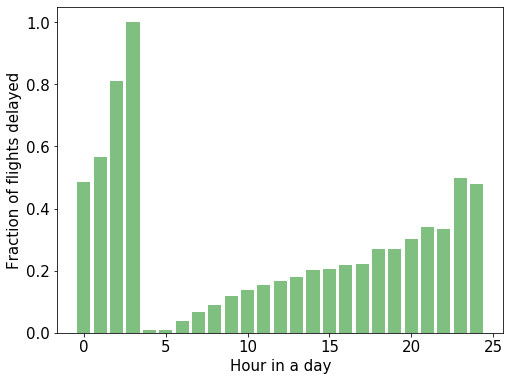

In [0]:
df['dep_hour'] = df['DEP_TIME'].apply(lambda x: int(x/100) if not np.isnan(x) else -1)
agg_hour = df.groupby(['dep_hour'], as_index=False).agg({'DEP_DEL15': 'sum', 'TAIL_NUM': 'count'})
agg_hour['frac'] = agg_hour['DEP_DEL15']/agg_hour['TAIL_NUM']
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})
plt.bar(agg_hour['dep_hour'], agg_hour['frac'], color='green', alpha=0.5)
plt.xlabel("Hour in a day")
plt.ylabel("Fraction of flights delayed")
plt.show()

The following chart shows how average fraction of flight delays vary with the month in year. Flights scheduled during summer and winter months tend to delay with higher probabilty compared to the flights scheduled during the spring and fall months. Thus, there appears to be seasonal effects in the flight departure delay, and thus, the month in year can be used to estimate the flight departure delay.

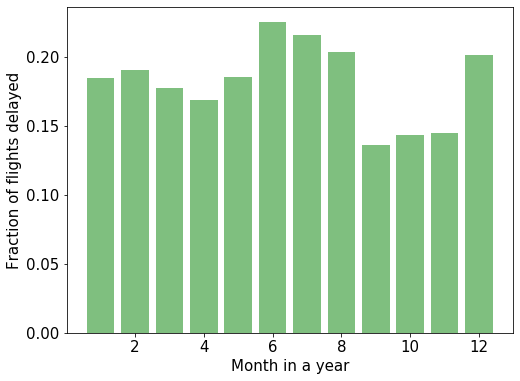

In [0]:
agg_month1 = df.groupby(['MONTH'], as_index=False).agg({'DEP_DEL15': 'sum', 'TAIL_NUM': 'count'})
agg_month1['frac'] = agg_month1['DEP_DEL15']/agg_month1['TAIL_NUM']
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})
plt.bar(agg_month1['MONTH'], agg_month1['frac'], color='green', alpha=0.5)
plt.xlabel("Month in a year")
plt.ylabel("Fraction of flights delayed")
plt.show()

On the other hand, the average fraction of flight delays have minor variabiilty with the day of month, as shown in the following figure. Thus, the day of month may not provide enough information to explain the variability in the flight delays. The day of month can be dropped from the explanatory variables of the model.

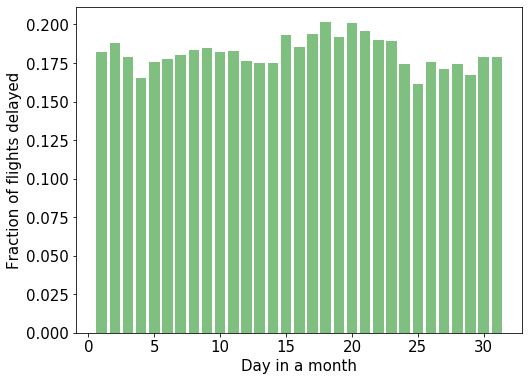

In [0]:
agg_month_day = df.groupby(['DAY_OF_MONTH'], as_index=False).agg({'DEP_DEL15': 'sum', 'TAIL_NUM': 'count'})
agg_month_day['frac'] = agg_month_day['DEP_DEL15']/agg_month_day['TAIL_NUM']
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})
plt.bar(agg_month_day['DAY_OF_MONTH'], agg_month_day['frac'], color='green', alpha=0.5)
plt.xlabel("Day in a month")
plt.ylabel("Fraction of flights delayed")
plt.show()

The following chart shows how flight departure delay varies with the day of week. In the box plot, the horizontal orange line represents median value and red dot shows the mean value. To get clear visual of various quartile values, the outliers are dropped from the box plot. We do not find substantial variability in the mean and median values over the day of week, and thus, the flight departure delay is not strongly correlated with the day of week.

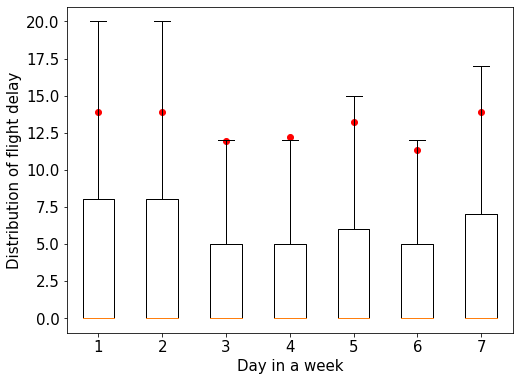

In [0]:
data_to_plot = []
data_avg_delay = []
labels = []

airline_data = df.dropna(subset=['DEP_DELAY_NEW'])
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})

for day in airline_data['DAY_OF_WEEK'].unique():
  data_to_plot.append(airline_data[airline_data['DAY_OF_WEEK']==day]['DEP_DELAY_NEW'].values)
  data_avg_delay.append(np.mean(airline_data[airline_data['DAY_OF_WEEK']==day]['DEP_DELAY_NEW']))
  labels.append(day)

plt.plot([x+1 for x in range(len(data_avg_delay))], data_avg_delay, 'ro')
plt.boxplot(data_to_plot, showfliers=False)
plt.xlabel("Day in a week")
plt.title('')
plt.ylabel("Distribution of flight delay")
plt.show()

The following chart shows the number of delayed flights and the total number of flights per carrier. A large fraction of flight delays is operated by large carriers compared to small carriers and thus, considering flight carrier in predicting flight delay may improve prediction accuracy of the model.

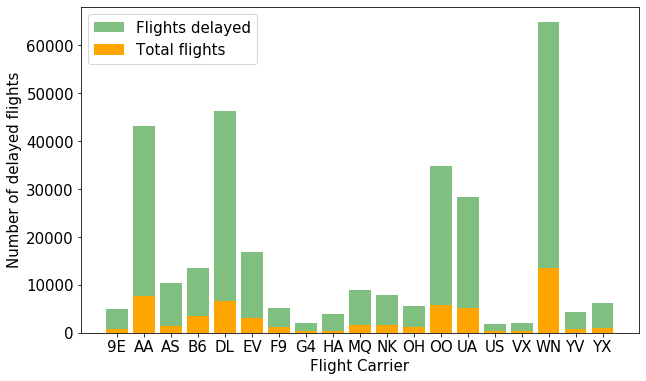

In [0]:
agg_carrier = df.groupby(['OP_CARRIER'], as_index=False).agg({'DEP_DEL15': 'sum', 'TAIL_NUM': 'count'})
agg_carrier['frac'] = agg_carrier['DEP_DEL15']/agg_carrier['TAIL_NUM']
plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 15})
plt.bar(agg_carrier['OP_CARRIER'], agg_carrier['TAIL_NUM'], label="Flights delayed", color='green', alpha=0.5)
plt.bar(agg_carrier['OP_CARRIER'], agg_carrier['DEP_DEL15'], label="Total flights", color='orange')
plt.xlabel("Flight Carrier")
plt.ylabel("Number of delayed flights")
plt.legend()
plt.show()

The following two charts show how flight departure delay varies with departure and arrival states. The average fraction of flight delays vary significantly from state-by-state. Potential explanation for such high variations in the departure delay is the variations in air traffic and weather across different states. Thus, the departure and arrival flight states may help the model explain the variabilities the flight departure delay.

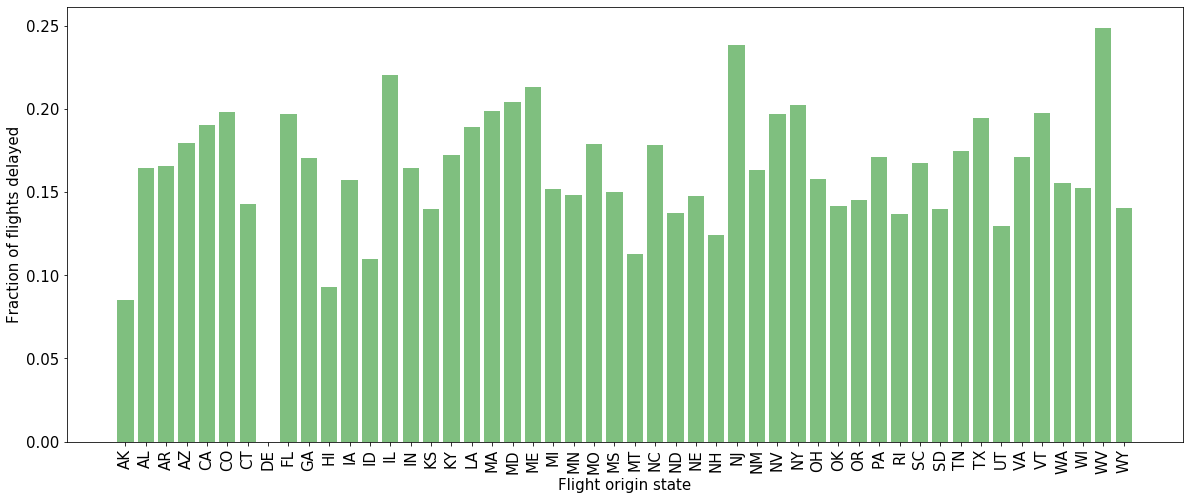

In [0]:
agg_origin_state = df.groupby(['ORIGIN_STATE_ABR'], as_index=False).agg({'DEP_DEL15': 'sum', 'TAIL_NUM': 'count'})
agg_origin_state['frac'] = agg_origin_state['DEP_DEL15']/agg_origin_state['TAIL_NUM']
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 15})
plt.bar(agg_origin_state['ORIGIN_STATE_ABR'], agg_origin_state['frac'], color='green', alpha=0.5)
plt.xlabel("Flight origin state")
plt.ylabel("Fraction of flights delayed")
plt.xticks(rotation=90)
plt.show()

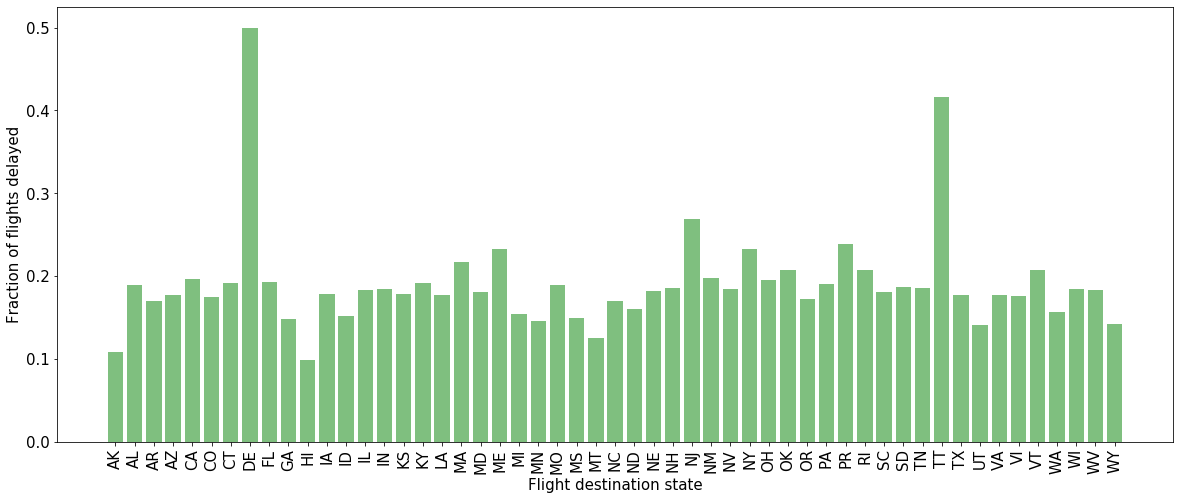

In [0]:
agg_dest_state = df.groupby(['DEST_STATE_ABR'], as_index=False).agg({'DEP_DEL15': 'sum', 'TAIL_NUM': 'count'})
agg_dest_state['frac'] = agg_dest_state['DEP_DEL15']/agg_dest_state['TAIL_NUM']
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 15})
plt.bar(agg_dest_state['DEST_STATE_ABR'], agg_dest_state['frac'], color='green', alpha=0.5)
plt.xlabel("Flight destination state")
plt.ylabel("Fraction of flights delayed")
plt.xticks(rotation=90)
plt.show()

The following scatter plot shows how flight delay varies with the flight distance. As the distance increases, flight delay decreases. One potential reason is that the further a flight needs to travel, the more opportunity the flight has to compensate for delay by adjusting flight speed. Thus, shorter distance flights appear to suffer more than 15 minutes of delay. Since flight departure delay is negatively correlated with the travelled distance, distance can be used to predict the departure delay in the model.

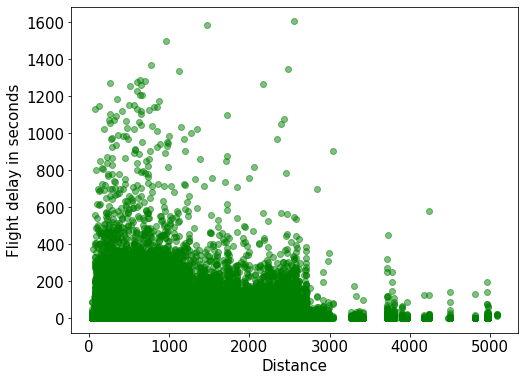

In [0]:
plt.figure(figsize=(8, 6))
plt.plot(df['DISTANCE'], df['DEP_DELAY_NEW'], 'go', alpha=0.5)
plt.xlabel("Distance in miles")
plt.ylabel('Flight delay in minutes')
plt.show()

The following matrix shows how flight departure delay is correlated with various other type of delays, such as carrier delay, NAS delay, weather delay, security delay, and late aircraft delay. As per the correlation coefficient, the flight departure delay is positively correlated with all delay types. Among various delay categories, the flight departure delay is strongly correlated with carrier delay and late aircraft delay. Late aircraft delay represents delay caused by the propogation of delay from earlier delayed schedules. Since flight delay is highly correlated to the delay propagation, delay propagation may provide strong prediction signal for flight delays.

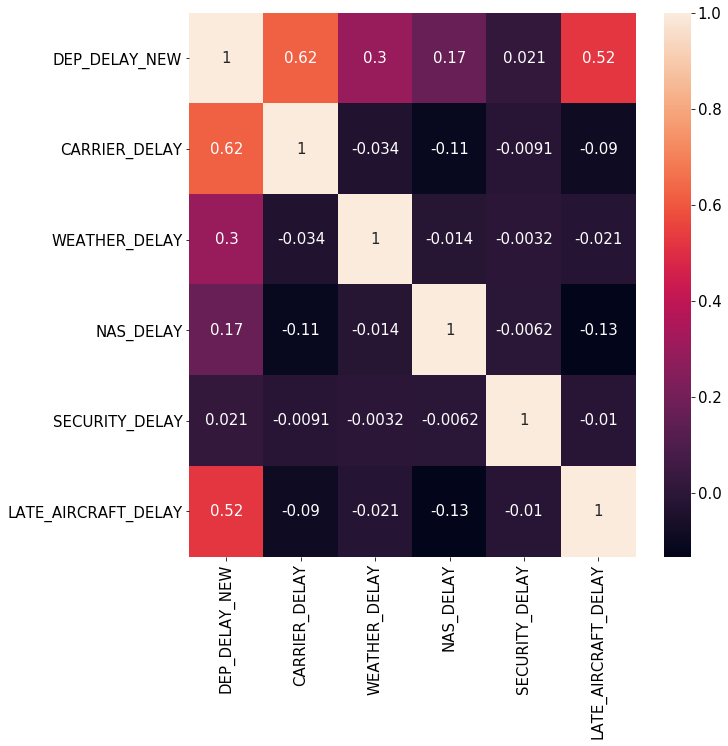

In [0]:
import pandas as pd
import seaborn as sn
corrMatrix = df[['DEP_DELAY_NEW', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].corr()
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 15})
sn.heatmap(corrMatrix, annot=True)
plt.show()

The following table shows the effects of delay propogation on flight delay. The probabilty a flight is delayed given that the previous flight leg was delayed is 0.064 and the probability of a flight is on time given that the flight was on time earlier in a day is 0.7804. Thus, the previous flight status indicates the current flight status for 84% of times. On the other hand, the probability a flight is delayed given that the previous flight leg was not delayed is 0.1178 and the probability a flight is on time given the previous flight was delayed is 0.037. Thus, 16% of times the current flight status is different from the previous flight status in a day. These results suggest that delay propogation can be a strong predictor of flight delays.

In [0]:
df2 = df.groupby(['PREV_DEP_DEL15', 'DEP_DEL15'], as_index=False)['TAIL_NUM'].count()
df2['fraction'] = df2['TAIL_NUM']/df.shape[0]
df2.columns = ['PREV_DEP_DEL15', 'DEP_DEL15', 'COUNTS', 'FRACTION']
df2

Out[35]:

PREV_DEP_DEL15 
 DEP_DEL15 
 COUNTS 
 FRACTION 
 
 
 
 
 0 
 0.0 
 0.0 
 243503 
 0.780486 
 
 
 1 
 0.0 
 1.0 
 36764 
 0.117837 
 
 
 2 
 1.0 
 0.0 
 11744 
 0.037642 
 
 
 3 
 1.0 
 1.0 
 19978 
 0.064034

##Join

###Weather Data Set

We are going to split the weather data set into three tables. One is going to be for the visibility (horzn_dist), wind speed, and temperature. Another is for whether there was thunder or not. The last table is for snow and precipitation. There are different filters that need to be applied for each of these tables like missing data and null values. Below is an example of each data pull. In addition, we will also be imputing values for the precipitation and snow data. If the precipitation or snow data is null, we take the daily average of precipitation/snow.

In [0]:
weather.createOrReplaceTempView('weather')

In [0]:
weather_smpl = weather.sample(False, 0.000001)
weather_smpl.select([(count(when(isnan(c) | col(c).isNull(), c))/weather.count()).alias(c) for c in weather.columns if c not in ["DATE"]]).toPandas().head()

Out[9]:

STATION 
 SOURCE 
 LATITUDE 
 LONGITUDE 
 ELEVATION 
 NAME 
 REPORT_TYPE 
 CALL_SIGN 
 QUALITY_CONTROL 
 WND 
 CIG 
 VIS 
 TMP 
 DEW 
 SLP 
 AW1 
 GA1 
 GA2 
 GA3 
 GA4 
 GE1 
 GF1 
 KA1 
 KA2 
 MA1 
 MD1 
 MW1 
 MW2 
 OC1 
 OD1 
 OD2 
 REM 
 EQD 
 AW2 
 AX4 
 GD1 
 AW5 
 GN1 
 AJ1 
 AW3 
 ... 
 GA6 
 KG1 
 AU3 
 AT7 
 KD1 
 GL1 
 IA1 
 GG2 
 OD3 
 UG1 
 CB1 
 AI6 
 CI1 
 CV2 
 AZ2 
 AD1 
 AH1 
 WD1 
 AA4 
 KC1 
 IA2 
 CF3 
 AI2 
 AT1 
 GD4 
 AX3 
 AH4 
 KB3 
 CU1 
 CN4 
 AT2 
 CG1 
 CF1 
 GG1 
 MV2 
 CW1 
 GG4 
 AB1 
 AH5 
 CN3 
 
 
 
 
 0 
 9.510157e-09 
 1.172919e-07 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 ... 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 
 
 
 1 rows × 176 columns

In [0]:
# Thunder
thunder_d = spark.sql('''select station,
                                to_date(date_trunc('DD',if(minute(date) <30, to_timestamp(concat(string(to_date(date)), ' ' , string(hour(date)) , ':00:00')),to_timestamp(concat(string(to_date(date)), ' ' , string(hour(date)) , ':00:00')) + interval 1 hour)),'YYYY-MM-DD') as updated_date_thunder,
                                                       '1' as thunder
                                                from weather
                                                where int(left(AW1,2)) =26 or int(left(AW1,2)) between 90 and 96''')

thunder_d.createOrReplaceTempView("thunder_d")
display(thunder_d)

station updated_date_thunder thunder 7650099999 2016-07-12 1 7650099999 2016-09-27 1 7650099999 2016-10-14 1 7650099999 2016-10-14 1 7650099999 2016-10-14 1 7650099999 2016-11-24 1 7650099999 2016-11-24 1 7650099999 2016-11-25 1 7667099999 2016-06-19 1 7667099999 2016-06-19 1 7667099999 2016-07-23 1 7667099999 2016-08-29 1 7667099999 2016-08-30 1 7667099999 2016-08-30 1 7667099999 2016-09-14 1 7667099999 2016-09-14 1 7667099999 2016-09-27 1 7667099999 2016-10-14 1 7667099999 2016-11-23 1 7667099999 2016-11-24 1 7675099999 2016-05-01 1 7675099999 2016-05-01 1 7675099999 2016-05-14 1 7675099999 2016-05-14 1 7675099999 2016-06-18 1 7675099999 2016-09-10 1 7675099999 2016-09-10 1 7675099999 2016-09-15 1 7675099999 2016-10-14 1 7247099999 2016-04-13 1 7247099999 2016-05-13 1 7247099999 2016-05-23 1 7247099999 2016-05-26 1 7247099999 2016-05-27 1 7247099999 2016-06-17 1 7247099999 2016-07-20 1 7247099999 2016-07-20 1 7249099999 2016-02-09 1 7249099999 2016-05-13 1 7249099999 2016-05-13 1 7249099999 2016-05-28 1 7249099999 2016-05-28 1 7249099999 2016-05-28 1 7249099999 2016-07-20 1 7249099999 2016-08-18 1 7255399999 2016-03-02 1 7255399999 2016-03-02 1 7255399999 2016-04-13 1 7255399999 2016-04-13 1 7255399999 2016-04-16 1 7255399999 2016-05-13 1 7255399999 2016-05-13 1 7255399999 2016-05-13 1 7255399999 2016-05-18 1 7255399999 2016-05-28 1 7255399999 2016-05-28 1 7255399999 2016-05-28 1 7255399999 2016-06-08 1 7255399999 2016-06-11 1 7255399999 2016-06-15 1 7255399999 2016-06-16 1 7255399999 2016-06-16 1 7255399999 2016-06-18 1 7255399999 2016-06-18 1 7255399999 2016-06-18 1 7255399999 2016-06-24 1 7255399999 2016-06-24 1 7255399999 2016-06-25 1 7255399999 2016-07-13 1 7255399999 2016-07-14 1 7255399999 2016-07-22 1 7255399999 2016-07-22 1 7255399999 2016-07-30 1 7255399999 2016-07-31 1 7255399999 2016-08-17 1 7255499999 2016-03-30 1 7255499999 2016-04-03 1 7255499999 2016-04-03 1 7255499999 2016-04-13 1 7255499999 2016-04-13 1 7255499999 2016-05-27 1 7255499999 2016-05-28 1 7255499999 2016-05-28 1 7255499999 2016-06-07 1 7255499999 2016-06-07 1 7255499999 2016-06-15 1 7255499999 2016-06-17 1 7255499999 2016-06-24 1 7255499999 2016-06-24 1 7255499999 2016-08-28 1 7260099999 2016-04-13 1 7260099999 2016-05-27 1 7260099999 2016-05-28 1 7260099999 2016-05-28 1 7260099999 2016-05-28 1 7260099999 2016-06-16 1 7260099999 2016-06-16 1 7260099999 2016-09-14 1 7260099999 2016-11-21 1 7260099999 2016-11-21 1 7266099999 2016-03-02 1 7266099999 2016-03-30 1 7266099999 2016-05-27 1 7266099999 2016-06-07 1 7266099999 2016-07-12 1 7280099999 2016-04-13 1 7280099999 2016-05-10 1 7280099999 2016-05-13 1 7280099999 2016-05-13 1 7280099999 2016-05-13 1 7280099999 2016-05-18 1 7280099999 2016-05-27 1 7280099999 2016-05-28 1 7280099999 2016-06-07 1 7280099999 2016-06-15 1 7280099999 2016-06-24 1 7280099999 2016-06-24 1 7280099999 2016-07-14 1 7280099999 2016-07-14 1 7280099999 2016-07-22 1 7280099999 2016-08-17 1 7280099999 2016-09-16 1 7280099999 2016-10-24 1 69015093121 2016-01-07 1 69015093121 2016-04-08 1 69015093121 2016-04-09 1 69015093121 2016-04-09 1 69015093121 2016-04-11 1 69015093121 2016-04-11 1 69015093121 2016-04-11 1 69015093121 2016-04-12 1 69015093121 2016-04-12 1 69015093121 2016-04-12 1 69015093121 2016-05-25 1 69015093121 2016-05-25 1 69015093121 2016-07-01 1 69015093121 2016-07-01 1 69015093121 2016-07-01 1 69015093121 2016-07-01 1 69015093121 2016-08-03 1 69015093121 2016-08-03 1 69015093121 2016-08-04 1 69015093121 2016-08-04 1 69015093121 2016-08-04 1 69015093121 2016-08-04 1 69015093121 2016-08-05 1 69015093121 2016-08-11 1 69015093121 2016-08-20 1 69015093121 2016-08-23 1 69015093121 2016-08-23 1 69015093121 2016-08-23 1 69015093121 2016-10-24 1 69015093121 2016-10-24 1 70026027502 2016-07-11 1 70026027502 2016-07-11 1 70371025333 2016-11-27 1 null 2016-05-02 1 null 2016-05-12 1 null 2016-05-21 1 null 2016-06-16 1 null 2016-06-16 1 null 2016-06-21 1 null 2016-06-21 1 null 2016-06-21 1 null 2016-06-23 1 null 2016-06-24 1 null 2

In [0]:
# Rain and Snow Hourly Data
rain_snow = spark.sql('''
select if(minute(date) <30, to_timestamp(concat(string(to_date(date)), ' ' , string(hour(date)) ,':00:00')),to_timestamp(concat(string(to_date(date)), ' ' , string(hour(date)) , ':00:00')) + interval 1 hour) as updated_date,
station,
                                                     max(int(left(AW1,2))) as weather_type,
                                                     avg(int(left(AN1,3))) as snow_hours,
                                                     avg(int(substring(AN1,5,4))) as snow_depth_in,
                                                     avg(int(left(aa1,2))) as precipitation_period_time_min,
                                                     avg(int(substring(aa1,4,4))) as precipitation_inches
                                               from weather
                                             where int(substring(aa1,4,4)) != 9999
                                             group by 1,2
''')

rain_snow.createOrReplaceTempView("rain_snow")
display(rain_snow)

updated_date station weather_type snow_hours snow_depth_in precipitation_period_time_min precipitation_inches 2017-07-05T18:00:00.000+0000 25356099999 null null null 12.0 60.0 2017-01-25T18:00:00.000+0000 25378099999 null null null 12.0 0.0 2017-03-27T06:00:00.000+0000 25378099999 null null null 12.0 0.0 2017-01-16T18:00:00.000+0000 25399099999 null null null 12.0 0.0 2017-04-07T18:00:00.000+0000 25399099999 null null null 12.0 2.0 2017-03-29T21:00:00.000+0000 25400099999 null null null 12.0 0.0 2017-04-05T06:00:00.000+0000 25469099999 null null null 12.0 0.0 2017-05-01T21:00:00.000+0000 25503099999 null null null 12.0 0.0 2017-05-22T21:00:00.000+0000 25503099999 null null null 12.0 0.0 2017-03-17T18:00:00.000+0000 25551099999 null null null 12.0 3.0 2017-09-27T06:00:00.000+0000 25561099999 null null null 12.0 40.0 2017-01-03T04:00:00.000+0000 72240513976 null null null 1.0 0.0 2017-02-04T11:00:00.000+0000 72240513976 null null null 1.0 0.0 2017-02-04T23:00:00.000+0000 72240513976 null null null 1.0 0.0 2017-02-05T22:00:00.000+0000 72240513976 null null null 1.0 0.0 2017-02-11T04:00:00.000+0000 72240513976 null null null 1.0 0.0 2017-01-02T14:00:00.000+0000 72241012917 61 null null 1.0 0.0 2017-01-25T07:00:00.000+0000 72241012917 null null null 1.0 0.0 2017-01-30T22:00:00.000+0000 72241012917 null null null 1.0 0.0 2017-01-07T16:00:00.000+0000 72241612971 null null null 1.0 0.0 2017-01-10T19:00:00.000+0000 72241612971 null null null 1.0 0.0 2017-01-11T23:00:00.000+0000 72241612971 null null null 1.0 0.0 2017-01-13T09:00:00.000+0000 72241612971 null null null 1.0 0.0 2017-01-15T04:00:00.000+0000 72241612971 30 null null 1.0 0.0 2017-02-11T03:00:00.000+0000 72241612971 null null null 1.0 0.0 2017-01-04T21:00:00.000+0000 72242012923 null null null 1.0 0.0 2017-01-05T01:00:00.000+0000 72242012923 null null null 1.0 0.0 2017-01-06T05:00:00.000+0000 72242012923 null null null 1.0 0.0 2017-01-08T22:00:00.000+0000 72242012923 null null null 1.0 0.0 2017-01-12T22:00:00.000+0000 72242012923 null null null 1.0 0.0 2017-01-21T09:00:00.000+0000 72242012923 10 null null 1.0 0.0 2017-02-03T01:00:00.000+0000 72242012923 null null null 1.0 0.0 2017-02-04T16:00:00.000+0000 72242012923 null null null 1.0 0.0 2017-02-07T04:00:00.000+0000 72242012923 10 null null 1.0 0.0 2017-02-09T20:00:00.000+0000 72242012923 null null null 1.0 0.0 2017-01-01T03:00:00.000+0000 72242712975 null null null 1.0 0.0 2017-01-06T13:00:00.000+0000 72242712975 null null null 1.0 0.0 2017-01-10T19:00:00.000+0000 72242712975 null null null 1.0 0.0 2017-01-15T16:00:00.000+0000 72242712975 null null null 1.0 0.0 2017-01-17T08:00:00.000+0000 72242712975 61 null null 1.0 1.6666666666666667 2017-01-26T06:00:00.000+0000 72242712975 null 24.0 0.0 12.5 1.5 2017-01-27T19:00:00.000+0000 72242712975 null null null 1.0 0.0 2017-02-07T17:00:00.000+0000 72242712975 null null null 1.0 0.0 2017-02-09T03:00:00.000+0000 72242712975 null null null 1.0 0.0 2017-01-13T05:00:00.000+0000 72242953910 10 null null 1.0 0.0 2017-01-22T17:00:00.000+0000 72242953910 null null null 1.0 0.0 2017-01-24T18:00:00.000+0000 72242953910 null null null 1.0 0.0 2017-01-25T12:00:00.000+0000 72242953910 null null null 1.0 2.3333333333333335 2017-02-07T03:00:00.000+0000 72242953910 null null null 1.0 0.0 2017-02-07T15:00:00.000+0000 72242953910 null null null 1.0 0.0 2017-01-12T17:00:00.000+0000 72243012960 null null null 1.0 0.0 2017-01-15T08:00:00.000+0000 72243012960 10 null null 1.0 0.0 2017-01-24T00:00:00.000+0000 72243012960 null null null 1.0 0.0 2017-01-26T22:00:00.000+0000 72243012960 null null null 1.0 0.0 2017-02-01T20:00:00.000+0000 72243012960 null null null 1.0 0.0 2017-01-17T18:00:00.000+0000 72244012918 null null null 1.0 0.0 2017-01-20T09:00:00.000+0000 72244012918 30 null null 1.0 0.0 2017-01-22T19:00:00.000+0000 72244012918 null null null 1.0 0.0 2017-02-04T13:00:00.000+0000 72244012918 null null null 1.0 0.0 2017-01-07T06:00:00.000+0000 17505099999 null null null 12.0 0.0 2017-03-14T12:00:00.00

In [0]:
# Final table with hourly weather and the rain_snow table and the thunder indicator table

weather_final = spark.sql('''select a.date,
                                   if(minute(date) <30, to_timestamp(concat(string(to_date(date)), ' ' , string(hour(date)) , ':00:00')),to_timestamp(concat(string(to_date(date)), ' ' , string(hour(date)) , ':00:00')) + interval 1 hour) as updated_date,
                                   concat(date, a.station) as date_station_id,
                                   a.station,
                                   avg(int(right(substring_index(wnd,',', 4),4))) as wind_speed,
                                   avg(int(substring_index(vis,',', 1))) as horzn_dist,
                                   avg(int(right(substring_index(vis,',', 2),1))) as horzn_dist_qual,
                                   avg(int(right(substring_index(tmp,',', 1),4))) as temp_c,
                                   avg(int(right(substring_index(tmp,',', 2),1))) as temp_c_qual,
                                   avg(int(substring_index(dew,',', 1))) as dew_point_temp,
                                   max(weather_type) as weather_type,
                                   avg(snow_hours) as snow_hours,
                                   avg(snow_depth_in) as snow_depth_in,
                                   avg(precipitation_period_time_min) as precipitation_period_time_min,
                                   avg(precipitation_inches) as precipitation_inches,
                                   ifnull(thunder,0) as thunder_ind
                                   from weather a
                                   left join rain_snow b
                                   on if(minute(date) <30, to_timestamp(concat(string(to_date(date)), ' ' , string(hour(date)) , ':00:00')),to_timestamp(concat(string(to_date(date)), ' ' , string(hour(date)) , ':00:00')) + interval 1 hour) = b.updated_date and a.station = b.station

                                   left join thunder_d d
                                  on  a.date = d.updated_date_thunder and a.station = d.station                  
                                   
                                   where report_type not in ('SOD','SOM')
                                   --and substring_index(wnd,',', 1) != 999 
                                   and right(substring_index(wnd,',', 4),4) != 999
                                   and substring_index(vis,',', 1) != 9999
                                   and int(substring_index(vis,',', 1)) != 999999
                                   and right(substring_index(vis,',', 2),1) in (1,5)
                                   and right(substring_index(tmp,',', 2),1) in (1,5)
                                   and a.station is not null --= 72528014733
                                   group by 1,2,3,4,16
                                   --having avg(int(right(substring_index(vis,',', 2),1))) is not null''')

weather_final.createOrReplaceTempView("weather_final")
display(weather_final)


weather_final.count()

Out[30]: 308505050

The next step we take is to get daily averages for the rain and snow as these columns had quite a bit of nulls compared to the visbility, temperature , and wind speed table.

In [0]:
# Take the weather data and find average per day

weather_day = spark.sql('''select 
                                   to_date(date_trunc('DD',if(minute(date) <30, to_timestamp(concat(string(to_date(date)), ' ' , string(hour(date)) , ':00:00')),to_timestamp(concat(string(to_date(date)), ' ' , string(hour(date)) , ':00:00')) + interval 1 hour)),'YYYY-MM-DD') as updated_date_d,
                                   a.station,
                                   avg(int(left(AN1,3))) as snow_hours_d,
                                   avg(int(substring(AN1,5,4))) as snow_depth_in_d,
                                   avg(int(left(aa1,2))) as precipitation_period_time_min_d,
                                   avg(int(substring(aa1,4,4))) as precipitation_inches_d
                                   from weather a  
                                   where int(substring(aa1,4,4)) != 9999 and int(substring(AN1,5,4)) !=9999
                                   group by 1,2
                                   order by avg(int(substring(AN1,5,4))) desc
                                   --having avg(int(right(substring_index(vis,',', 2),1))) is not null''')
weather_day.createOrReplaceTempView("weather_day")
display(weather_day)

Once we have the daily averages we can create an if statement for the nulls in the weather hourly data set.

In [0]:
# Final join to bring in average of snow and precipitation by day and impute the nulls.

weather_final_2 = spark.sql('''select to_date(date_trunc('DD',date),'YYYY-MM-DD') as datee,
                                    updated_date,
                                    date_Station_id,
                                    a.station,
                                    wind_speed,
                                    horzn_dist,
                                    horzn_dist_qual,
                                    temp_c,
                                    temp_c_qual,
                                    dew_point_temp,
                                    weather_type,
                                    snow_hours,
                                    snow_depth_in,
                                    precipitation_period_time_min,
                                    precipitation_inches,
                                    precipitation_period_time_min_d,
                                    precipitation_inches_d,
                                    if(precipitation_inches/precipitation_period_time_min is null, precipitation_inches_d/precipitation_period_time_min_d,precipitation_inches/precipitation_period_time_min) as precipitation_inches_min_final,
                                    thunder_ind
                               from weather_final a
                               
                               left join weather_day b
                               on date_trunc('DD',date) = b.updated_date_d and a.station = b.station
                               ''')
weather_final_2.createOrReplaceTempView('weather_final_2')
display(weather_final_2)

weather_final_2.count()

### Airline Data Set

Here we bring in the airlines data set with the dep_delay feature that we have created along with subtracting two hours from the original departure time to join with the weather data. We also round down for the departure time so that each new departure time that we are joining with the weather data is between 2-3 hours before the actual departure time.

In [0]:
# read in airlines_with_weather_station_utc_dep
airlines_with_weather_station_utc = spark.read.option("header", "true").parquet(f"dbfs:/user/nathan.nusaputra@ischool.berkeley.edu/FINAL_PROJECT/airlines_with_weather_station_utc")
airlines_with_weather_station_utc_dep.createOrReplaceTempView('airlines_with_weather_station_utc')
display(airlines_with_weather_station_utc)
airlines_with_weather_station_utc.count()

In [0]:
# Hourly Data
# make a time stamp
airlines_with_updated_weather_hourly = spark.sql('''select fl_date,
concat(utc_dep_time,op_unique_carrier,origin_station_id, op_carrier_fl_num) as id,
                                              op_carrier_airline_id,
                                              op_unique_carrier,
                                              year,
                                              quarter,
                                              month,
                                              day_of_month,
                                              day_of_week,
                                              origin_city_name,
                                              op_carrier_fl_num,
                                              op_carrier,
                                              origin_State_abr,
                                              dest_state_abr,
                                              origin,
                                              dest,
                                              arr_delay_new,
                                              distance,
                                              weather_delay,
                                              nas_delay,
                                              security_delay,
                                              carrier_delay,
                                              late_aircraft_delay,
                                            
                    origin_station_id,
                    local_dep_time,
                    timezone,
                    utc_dep_time,
                    to_timestamp(concat(date(utc_dep_time), ' ' , hour(utc_dep_time), ':' ,'00', ':' , '00'))- interval 2 hours as updated_dep_time,
                    dep_delay_new,
                    dep_del15,
                    dep_time_diff,
                    prev_dep_del15
                    from airlines_with_weather_station_utc
                    where origin_station_id is not null
                    group by 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
                    order by utc_dep_time''')
# move it to a temp table
airlines_with_updated_weather_hourly.createOrReplaceTempView('airlines_with_updated_weather_hourly')

display(airlines_with_updated_weather_hourly)

airlines_with_updated_weather_hourly.count()

Once we have our weather and airlines data we can finally inner join them to ensure we only include values that are on both tables. We also added in features like a weekend indicator which includes Friday, Saturday, and Sunday as a weekend. Lastly, we checked each column to ensure there was no nulls and if there was to drop the row. The final output is displayed below.

In [0]:
# read in the final weather data set and the airlines that was previously saved before running the join
airlines_with_weather_final = spark.read.option("header", "true").parquet(f"dbfs:/user/nathan.nusaputra@ischool.berkeley.edu/FINAL_PROJECT/airlines_with_weather_final")
airlines_with_weather_final .createOrReplaceTempView('airlines_with_weather_final ')
display(airlines_with_weather_final)
airlines_with_weather_final.count()

We have a final dataset of 27,212,468 records. Finally we can split the data 90/10 for train/test and read it back in.

In [0]:
airlines_with_weather_train = spark.read.option("header", "true").parquet(f"dbfs:/user/nathan.nusaputra@ischool.berkeley.edu/FINAL_PROJECT/airlines_with_weather_train")
airlines_with_weather_train.createOrReplaceTempView('airlines_with_weather_train')
airlines_with_weather_test = spark.read.option("header", "true").parquet(f"dbfs:/user/nathan.nusaputra@ischool.berkeley.edu/FINAL_PROJECT/airlines_with_weather_test")
airlines_with_weather_test.createOrReplaceTempView('airlines_with_weather_test')

In [0]:
display(airlines_with_weather_train.take(5))

fl_date id op_carrier_airline_id op_unique_carrier year quarter month day_of_month day_of_week origin_city_name op_carrier_fl_num op_carrier origin_State_abr dest_state_abr origin dest arr_delay_new distance weather_delay nas_delay security_delay carrier_delay late_aircraft_delay origin_station_id dep_delay_new dep_del15 dep_time_diff prev_dep_del15 thunder_ind temp_c wind_speed horzn_dist precipitation_period_time_min num_flights_aircraft_per_day weekend 2015-01-01 2015-01-01109719393Baltimore, MD 19393 WN 2015 1 1 1 4 Baltimore, MD 1097 WN MD CT BWI BDL 23.0 283.0 0.0 2.0 0.0 5.0 16.0 72406093721 21.0 1.0 2.25 1.0 0 39.0 51.0 16093.0 0.0 3 0 2015-01-01 2015-01-01109719790Los Angeles, CA 19790 DL 2015 1 1 1 4 Los Angeles, CA 1097 DL CA NC LAX RDU 0.0 2239.0 null null null null null 72295023174 0.0 0.0 3.0833333333333335 0.0 0 78.0 31.0 16093.0 0.0 3 0 2015-01-01 2015-01-01109719977Houston, TX 19977 UA 2015 1 1 1 4 Houston, TX 1097 UA TX CA IAH LAX 0.0 1379.0 null null null null null 72243012960 0.0 0.0 0.0 0.0 0 61.0 51.0 16093.0 0.0 3 0 2015-01-01 2015-01-01137619790Atlanta, GA 19790 DL 2015 1 1 1 4 Atlanta, GA 1376 DL GA NE ATL OMA 0.0 821.0 null null null null null 72219013874 0.0 0.0 3.05 0.0 0 117.0 31.0 16093.0 0.0 2 0 2015-01-01 2015-01-01137620436Washington, DC 20436 F9 2015 1 1 1 4 Washington, DC 1376 F9 VA FL IAD MIA 0.0 921.0 null null null null null 72403093738 0.0 0.0 0.0 0.0 0 67.0 26.0 16093.0 0.0 2 0

In [0]:
from pyspark.sql.functions import isnan, when, count, col
pydf3 = airlines_with_weather_train.sample(False, 0.01)
pydf3.select([(count(when(isnan(c) | col(c).isNull(), c))/pydf3.count()).alias(c) for c in pydf3.columns if c not in ['local_dep_time', 'utc_dep_time']]).toPandas().head()

Out[40]:

fl_date 
 id 
 op_carrier_airline_id 
 op_unique_carrier 
 year 
 quarter 
 month 
 day_of_month 
 day_of_week 
 origin_city_name 
 op_carrier_fl_num 
 op_carrier 
 origin_State_abr 
 dest_state_abr 
 origin 
 dest 
 arr_delay_new 
 distance 
 weather_delay 
 nas_delay 
 security_delay 
 carrier_delay 
 late_aircraft_delay 
 origin_station_id 
 dep_delay_new 
 dep_del15 
 dep_time_diff 
 prev_dep_del15 
 thunder_ind 
 temp_c 
 wind_speed 
 horzn_dist 
 precipitation_period_time_min 
 num_flights_aircraft_per_day 
 weekend 
 
 
 
 
 0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.00299 
 0.0 
 0.815086 
 0.815086 
 0.815086 
 0.815086 
 0.815086 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0 
 0.0

The following plot shows how flight departure delay varies with atmospheric temperature. Up to a certain temperature value, flight dealy is invarient of the temperature; however, after a certain termperature value, flight departure delay decreases. One potential justification is, precipitation, wind, snow, and rain mostly occur in colder termperature, which may leads to higher delay compared to warmer temperature. Thus, flight departure delay is negatively correlated with temperature which can help us explain variability in the flight departure prediction.

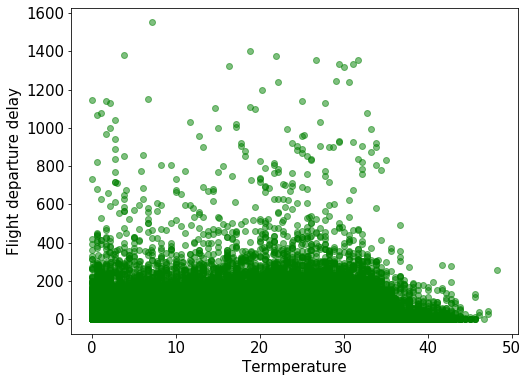

In [0]:
final_data=pydf3.toPandas()
final_data['temp_c'] = final_data['temp_c']/10
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})
#pd.plotting.scatter_matrix(final_data[['dep_delay_new', 'temp_c', 'precipitation_period_time_min']], alpha=0.5, figsize=(20, 20), diagonal = 'kde')
plt.plot(final_data['temp_c'], final_data['dep_delay_new'], 'go', alpha=0.5)
plt.xlabel("Termperature in celcius")
plt.ylabel("Flight departure delay in minutes")
plt.show()

The following chart shows how the flight departure delay varies with the precipitation time. The flight departure delay decreases as the precipitation time increases. One possible explanation is that longer precipitation time allows more predictability in controlling flight schedules compared to the shorter precipitation time. Shorter precipitation time may be caused by sudden weather changes resulting in flight schedules that are difficult to control. Since flight departure delay is negatively correlated with the precipitation time, precipitation time can be used as a feature to explain delay.

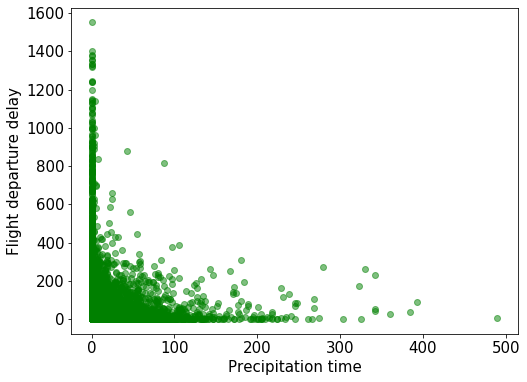

In [0]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})
#pd.plotting.scatter_matrix(final_data[['dep_delay_new', 'temp_c', 'precipitation_period_time_min']], alpha=0.5, figsize=(20, 20), diagonal = 'kde')
plt.plot(final_data['precipitation_period_time_min'], final_data['dep_delay_new'], 'go', alpha=0.5)
plt.xlabel("Precipitation time in minutes")
plt.ylabel("Flight departure delay in minutes")
plt.show()

The following graph shows how flight departure delay varies with wind speed. To extract out the correlation between the flight departure delay and wind speed, we remove the data points when wind is lower than 200. In the resultant graph, we can find that the flight departure delay increases with the wind speed. Thus, wind speed can be used to explain the variability in the departure delay.

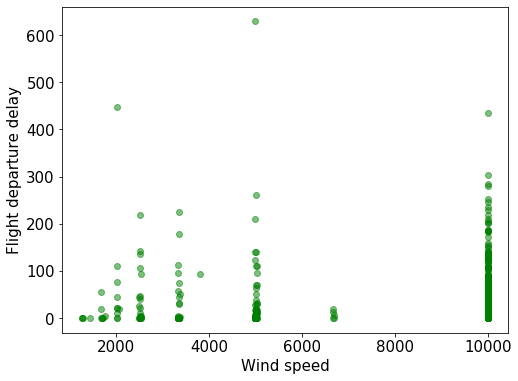

In [0]:
final_data = final_data[final_data['wind_speed'] > 200]
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 15})
#pd.plotting.scatter_matrix(final_data[['dep_delay_new', 'temp_c', 'precipitation_period_time_min']], alpha=0.5, figsize=(20, 20), diagonal = 'kde')
plt.plot(final_data['wind_speed'], final_data['dep_delay_new'], 'go', alpha=0.5)
plt.xlabel("Wind speed")
plt.ylabel("Flight departure delay in minutes")
plt.show()

The following table shows the number of flights delayed during weekdays and weekends. In the selected data sample, 15% of flights are delayed during weekdays and only 7% of the flights are delayed duging weekend. Thus, flights scheduled over weekend appears to be on time by a factor of 2. Thus, weather the day of a week is either weekday or weekend can be used to predict the flight departure delay in the model.

In [0]:
df_delay_daytype = final_data.groupby(['weekend'], as_index=False).agg({'dep_del15': 'sum'})
df_delay_daytype.columns = ['weekend', 'delay_counts']
df_delay_daytype['ratio'] = df_delay_daytype['delay_counts']/final_data.shape[0]
df_delay_daytype

Out[46]:

weekend 
 delay_counts 
 ratio 
 
 
 
 
 0 
 0 
 196.0 
 0.154818 
 
 
 1 
 1 
 99.0 
 0.078199

## Algorithm Exploration

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import ParamGridBuilder
import numpy as np
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import StandardScaler, StringIndexer, OneHotEncoder, VectorAssembler

## Random Forest model with hyper parameter tuning

In [0]:
# Reading training and testing dataset
airlines_with_weather_train = spark.read.option("header", "true").parquet(f"dbfs:/user/nathan.nusaputra@ischool.berkeley.edu/FINAL_PROJECT/airlines_with_weather_train")
airlines_with_weather_train.createOrReplaceTempView('airlines_with_weather_train')
airlines_with_weather_test = spark.read.option("header", "true").parquet(f"dbfs:/user/nathan.nusaputra@ischool.berkeley.edu/FINAL_PROJECT/airlines_with_weather_test")
airlines_with_weather_test.createOrReplaceTempView('airlines_with_weather_test')
airlines_with_weather_train = airlines_with_weather_train.withColumn("thunder_ind", airlines_with_weather_train.thunder_ind.cast("double"))
airlines_with_weather_test = airlines_with_weather_test.withColumn("thunder_ind", airlines_with_weather_test.thunder_ind.cast("double"))

# Selecting the features of interest
df_train = airlines_with_weather_train.select('dep_del15', 'month', 'day_of_month', 'day_of_week', 'op_carrier', 'distance', 'prev_dep_del15', 'thunder_ind', 'temp_c', 'wind_speed', 'horzn_dist', 'precipitation_period_time_min', 'weekend')
df_test = airlines_with_weather_test.select('dep_del15', 'month', 'day_of_month', 'day_of_week', 'op_carrier', 'distance', 'prev_dep_del15', 'thunder_ind', 'temp_c', 'wind_speed', 'horzn_dist', 'precipitation_period_time_min', 'weekend')

# Sampling the subset of data from the training and testing data set
# NOTE: Due to slowness of the cluster and limitation of resources, We are considering the fraction of data for the model training and testing purpose.
df_train = df_train.sample(False, 0.0001)
df_test = df_test.sample(False, 0.0001)

# Creating one-hot encoding for the categorial 
categoricalColumns = ['month', 'day_of_month', 'day_of_week', 'op_carrier']
numericCols = ['distance', 'prev_dep_del15', 'thunder_ind', 'temp_c', 'wind_speed', 'horzn_dist', 'precipitation_period_time_min', 'weekend']
for variable in categoricalColumns:
    #converts string variables to numerical indices
    indexer = StringIndexer(inputCol=variable, outputCol=variable+"index")
    df_train = indexer.fit(df_train).transform(df_train)
    df_test = indexer.fit(df_test).transform(df_test)
    #explodes the now numerical categorical variables into binary variables 
    encoder = OneHotEncoder(inputCol=variable+"index", outputCol=variable+"vec")
    df_train = encoder.fit(df_train).transform(df_train)
    df_test = encoder.fit(df_test).transform(df_test)

# Creating a vector of features for model training in ML-lib
assembler = VectorAssembler(
    inputCols=['monthvec',
               'day_of_monthvec',
               'day_of_weekvec',
               'op_carriervec',
               'distance',
               'prev_dep_del15',
               'thunder_ind', 
               'temp_c', 
               'wind_speed',
               'horzn_dist',
               'precipitation_period_time_min',
               'weekend'
              ],
    outputCol="features")



In [0]:
# Crearing a parameter grid for hyper-parameter tunning in random forest
# Tunnign the number of trees and the maximum depth of each tree

rf = RandomForestClassifier(labelCol="dep_del15", featuresCol="features")
pipeline = Pipeline(stages=[assembler, rf])

paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [int(x) for x in np.linspace(start = 1, stop = 100, num = 5)]) \
    .addGrid(rf.maxDepth, [int(x) for x in np.linspace(start = 5, stop = 20, num = 4)]) \
    .build()

In [0]:
# Creating binary classification evaluator object cross validation object for grid search
evaluator = BinaryClassificationEvaluator().setLabelCol("dep_del15")

crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)


In [0]:
df_train_updated = df_train.select('dep_del15', 'distance', 'prev_dep_del15', 'thunder_ind', 'temp_c', 'wind_speed', 'horzn_dist', 'precipitation_period_time_min', 'weekend', 'monthvec', 'day_of_monthvec', 'day_of_weekvec', 'op_carriervec')

df_test_updated = df_test.select('dep_del15', 'distance', 'prev_dep_del15', 'thunder_ind', 'temp_c', 'wind_speed', 'horzn_dist', 'precipitation_period_time_min', 'weekend', 'monthvec', 'day_of_monthvec', 'day_of_weekvec', 'op_carriervec')


In [0]:
# Training random forest model for various hyper parameters
cvModel = crossval.fit(df_train_updated)

MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.

In [0]:
# Predicting flight delays on the test dataset.
predictions = cvModel.transform(df_test_updated)
cm = predictions.select("dep_del15", "prediction")

In [0]:
# Calculating true positive, true negative, false positive, and false negatives
# TP = cm.filter((cm.dep_del15 == cm.prediction) & (cm.prediction == 1)).count()
# TN = cm.filter((cm.dep_del15 == cm.prediction) & (cm.prediction == 0)).count()
# FP = cm.filter((cm.dep_del15 != cm.prediction) & (cm.prediction == 1)).count()
# FN = cm.filter((cm.dep_del15 != cm.prediction) & (cm.prediction == 0)).count()

In [0]:
# Calculating accuract, recall, f1 score, and precision
# accuracy = (TP + TN) / (TP + TN + FP + FN)
# recall = TP/(TP + FN)
# precision = TP/(TP + FP)
# f1_score = 2 * ((precision * recall) / (precision + recall))
# print('Recall - ', recall)
# print('Precision - ', precision)
# print('accuracy - ', accuracy)
# print('f1_score - ', f1_score)

In [0]:
# Finding the best hyper parameters optimizing the model performance
bestPipeline = cvModel.bestModel
bestModel = bestPipeline.stages[1]
print('numTrees - ', bestModel.getNumTrees)
print('maxDepth - ', bestModel.getOrDefault('maxDepth'))

numTrees - 100
maxDepth - 5

#### Testing Logistic Regression, Decision Tree, and Random Forest modeling code

In [0]:
airlines_with_weather_train = spark.read.option("header", "true").parquet(f"dbfs:/user/nathan.nusaputra@ischool.berkeley.edu/FINAL_PROJECT/airlines_with_weather_train")
airlines_with_weather_train.createOrReplaceTempView('airlines_with_weather_train')

airlines_with_weather_test = spark.read.option("header", "true").parquet(f"dbfs:/user/nathan.nusaputra@ischool.berkeley.edu/FINAL_PROJECT/airlines_with_weather_test")
airlines_with_weather_test.createOrReplaceTempView('airlines_with_weather_test')

airlines_with_weather_train = airlines_with_weather_train.withColumn("thunder_ind", airlines_with_weather_train.thunder_ind.cast("double"))
airlines_with_weather_test = airlines_with_weather_test.withColumn("thunder_ind", airlines_with_weather_test.thunder_ind.cast("double"))

In [0]:
from pyspark.ml.feature import StandardScaler, StringIndexer, OneHotEncoder, VectorAssembler

df_train = airlines_with_weather_train.select('dep_del15', 'month', 'day_of_month', 'day_of_week', 'op_carrier', 'distance', 'prev_dep_del15', 'thunder_ind', 'temp_c', 'wind_speed', 'horzn_dist', 'precipitation_period_time_min', 'num_flights_aircraft_per_day', 'weekend')


df_test = airlines_with_weather_test.select('dep_del15', 'month', 'day_of_month', 'day_of_week', 'op_carrier', 'distance', 'prev_dep_del15', 'thunder_ind', 'temp_c', 'wind_speed', 'horzn_dist', 'precipitation_period_time_min', 'num_flights_aircraft_per_day', 'weekend')

categoricalColumns = ['month', 'day_of_month', 'day_of_week', 'op_carrier']
numericCols = ['distance', 'prev_dep_del15', 'thunder_ind', 'temp_c', 'wind_speed', 'horzn_dist', 'precipitation_period_time_min', 'num_flights_aircraft_per_day', 'weekend']

for variable in categoricalColumns:
    #converts string variables to numerical indices e.g. January to 1, February to 2 etc.
    indexer = StringIndexer(inputCol=variable, outputCol=variable+"index")
    df_train = indexer.fit(df_train).transform(df_train)
    df_test = indexer.fit(df_test).transform(df_test)
    #explodes the now numerical categorical variables into binary variables 
    encoder = OneHotEncoder(inputCol=variable+"index", outputCol=variable+"vec")
    df_train = encoder.fit(df_train).transform(df_train)
    df_test = encoder.fit(df_test).transform(df_test)
    
assembler = VectorAssembler(
    inputCols=['monthvec',
               'day_of_monthvec',
               'day_of_weekvec',
               'op_carriervec',
               'distance',
               'prev_dep_del15',
               'thunder_ind', 
               'temp_c', 
               'wind_speed',
               'horzn_dist',
               'precipitation_period_time_min',
               'weekend'
              ],
    outputCol="vectorized_features")

df_train = assembler.transform(df_train)
df_test = assembler.transform(df_test)

standardscaler = StandardScaler().setInputCol("vectorized_features").setOutputCol("features")
df_train = standardscaler.fit(df_train).transform(df_train)
df_test = standardscaler.fit(df_test).transform(df_test)

In [0]:
### ALGORITHMS EXPLORED

# LOGISTIC REGRESSION
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'dep_del15', maxIter = 3)
lrModel = lr.fit(df_train)
predictions = lrModel.transform(df_test)
predictions.createOrReplaceTempView('predictions')

## Confusion matrix results for Logistic Regression Model
q = 'SELECT dep_del15 as actual, prediction, count(*) FROM predictions GROUP BY 1,2'
display(sqlContext.sql(q))

actual prediction count(1) 1.0 1.0 176572 0.0 1.0 103913 1.0 0.0 322483 0.0 0.0 2118384

In [0]:
# DECISION TREE
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'vectorized_features', labelCol = 'dep_del15', maxDepth = 3)
dtModel = dt.fit(df_train)
predictions = dtModel.transform(df_test)
predictions.createOrReplaceTempView('predictions')

## Confusion matrix results for Decision Tree Model
q = 'SELECT dep_del15 as actual, prediction, count(*) FROM predictions GROUP BY 1,2'
display(sqlContext.sql(q))

actual prediction count(1) 1.0 1.0 178706 0.0 1.0 106108 1.0 0.0 320349 0.0 0.0 2116189

In [0]:
# RANDOM FOREST
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'dep_del15', numTrees = 10, maxDepth = 10)
rfModel = rf.fit(df_train)
predictions = rfModel.transform(df_test)
predictions.createOrReplaceTempView('predictions')

## Confusion matrix results for Random Forest Model
q = 'SELECT dep_del15 as actual, prediction, count(*) FROM predictions GROUP BY 1,2'
display(sqlContext.sql(q))

actual prediction count(1) 1.0 1.0 84167 0.0 1.0 40248 1.0 0.0 414888 0.0 0.0 2182049

###Algorithm Implementation 

A simple toy example has been created to demonstrate the underlying details of the decision tree algorithm. This implementation of the decision tree predicts if an applicant receives an admissions offer from MIDS. The features included are the applicant's undergrad school (Cal or Stanford) and GPA (0 to 4.0). A dataframe toy example is created and the decision tree is implemented through Pyspark. We have displayed the decision tree stages and have run a single prediction test case. A detailed hand calculation of the decision tree algorithm is provided and the results match the output from the model fitted in Pyspark.

In [0]:
# generate toy data for decision tree classification
import pandas as pd

# features are undergrad college (cal/stanford) and gpa (from 0 to 4.0)
# dependent variable is if the applicant receives a MIDS offer of admission
x = ["cal","cal", "cal","cal","stanford","stanford","stanford"]
y = [ 3.1, 3.2, 3.3, 3.9, 3.5, 3.7, 4.0]
result = ["no", "yes", "yes", "yes", "no", "no", "yes"]   

# create dataframe
pd_df = pd.DataFrame([x,y,result]).transpose()
pd_df.columns = ['undergrad', 'gpa', 'offer']
toy_df = spark.createDataFrame(pd_df)
display(toy_df)

undergrad gpa offer cal 3.1 no cal 3.2 yes cal 3.3 yes cal 3.9 yes stanford 3.5 no stanford 3.7 no stanford 4.0 yes

In [0]:
# prepare data with category indexing, one-hot encoding, and vector assembler
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

# identify categorical and numeric features
categoricalCols = ['undergrad']
numericCols = ['gpa']

# convert string variables to numeric indices using string indexer
# convert numeric indices into binary variables using one hot encoder
for variable in categoricalCols:
    indexer = StringIndexer(inputCol = variable, outputCol = variable + 'index')
    toy_df = indexer.fit(toy_df).transform(toy_df)
    encoder = OneHotEncoder(inputCols=[indexer.getOutputCol()], outputCols=[variable + "vec"])
    toy_df = encoder.fit(toy_df).transform(toy_df)

# index the dependent variable    
label_indexer = StringIndexer(inputCol = 'offer', outputCol = 'label')
toy_df = label_indexer.fit(toy_df).transform(toy_df)

# assemble vectors from categorical and numeric features
assemblerInputs = [c + "vec" for c in categoricalCols] + numericCols
assembler = VectorAssembler(inputCols = assemblerInputs, outputCol = "features")
toy_df = assembler.transform(toy_df)

# show the dataframe
print("Training Dataset Count: " + str(toy_df.count()))
toy_df.select("undergrad", "gpa", "offer", "features", "label").show()

Training Dataset Count: 7
+---------+---+-----+---------+-----+
undergrad|gpa|offer| features|label|
+---------+---+-----+---------+-----+
 cal|3.1| no|[1.0,3.1]| 1.0|
 cal|3.2| yes|[1.0,3.2]| 0.0|
 cal|3.3| yes|[1.0,3.3]| 0.0|
 cal|3.9| yes|[1.0,3.9]| 0.0|
 stanford|3.5| no|[0.0,3.5]| 1.0|
 stanford|3.7| no|[0.0,3.7]| 1.0|
 stanford|4.0| yes|[0.0,4.0]| 0.0|
+---------+---+-----+---------+-----+

In [0]:
# Decision Tree Model
# Fit the training model
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 2)
dtModel = dt.fit(toy_df)

In [0]:
# show the decision tree
dtModel_stages  = dtModel
print(dtModel_stages.toDebugString)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_47b25e1ed9c6, depth=2, numNodes=5, numClasses=2, numFeatures=2
 If (feature 1 <= 3.8)
 If (feature 0 in {1.0})
 Predict: 0.0
 Else (feature 0 not in {1.0})
 Predict: 1.0
 Else (feature 1 > 3.8)
 Predict: 0.0

In [0]:
# run a test case for cal undergrad with 3.2 GPA
import pyspark.sql.functions as f

#create test case
test_df = toy_df.filter(f.col('gpa')==3.2)

# prediction based on test data
predictions_dt = dtModel.transform(test_df)
predictions_dt.select("label", "features", "probability", "prediction").show(10)

+-----+---------+--------------------+----------+
label| features| probability|prediction|
+-----+---------+--------------------+----------+
 0.0|[1.0,3.2]|[0.66666666666666...| 0.0|
+-----+---------+--------------------+----------+

Decision Tree hand calculation

<img src ="https://raw.githubusercontent.com/rsawasaki/ucb_mids_projects/master/machine_learning_at_scale/decision_tree.JPG">

Here is how many algorithm models we ran and their respective accuracy, recall and precision.

<img src ="https://raw.githubusercontent.com/nnusaputra/Machine-Learning-At-Scale/master/Final%20Project%20Algorithms.png?token=AOGDNAUI7MYOTHIORHVUQRC73YREW">

### Conclusions 
Our final model is trained and tested below. The Decision Tree Classifier has taken varying times to complete training (usually depending on what the current load on the cluster is at the time of training). At the quickest, the model has completed training in 2.81 minutes, while the longest training time took 13.43 minutes.

With a focus on the Recall rate (out of all the delayed flights, how many were we able to predict), the performance of the model is:

Accuracy: 		84%  
Recall: 		35%  
Precision: 		63%  

The practical implications resulting from the performance of the model are quite effective. In 2017, United and United Express operated more than 1.6 million flights carrying more than 148 million customers. Assuming a similar delay rate as our dataset (~20%), about 320,000 of these flights experienced a delay. Using our model, we would’ve correctly predicted 112,000 of these flights to be delayed ahead of time. With proper care taken for a predicted delay (contact customers, make schedule adjustments, etc.), United can potentially be saving $132M.

In [0]:
airlines_with_weather_train = spark.read.option("header", "true").parquet(f"dbfs:/user/nathan.nusaputra@ischool.berkeley.edu/FINAL_PROJECT/airlines_with_weather_train")
airlines_with_weather_train.createOrReplaceTempView('airlines_with_weather_train')

airlines_with_weather_test = spark.read.option("header", "true").parquet(f"dbfs:/user/nathan.nusaputra@ischool.berkeley.edu/FINAL_PROJECT/airlines_with_weather_test")
airlines_with_weather_test.createOrReplaceTempView('airlines_with_weather_test')

airlines_with_weather_train = airlines_with_weather_train.withColumn("thunder_ind", airlines_with_weather_train.thunder_ind.cast("double"))
airlines_with_weather_test = airlines_with_weather_test.withColumn("thunder_ind", airlines_with_weather_test.thunder_ind.cast("double"))

In [0]:
from pyspark.ml.feature import StandardScaler, StringIndexer, OneHotEncoder, VectorAssembler

df_train = airlines_with_weather_train.select('dep_del15', 'month', 'day_of_month', 'day_of_week', 'op_carrier', 'distance', 'prev_dep_del15', 'thunder_ind', 'temp_c', 'wind_speed', 'horzn_dist', 'precipitation_period_time_min', 'num_flights_aircraft_per_day', 'weekend')


df_test = airlines_with_weather_test.select('dep_del15', 'month', 'day_of_month', 'day_of_week', 'op_carrier', 'distance', 'prev_dep_del15', 'thunder_ind', 'temp_c', 'wind_speed', 'horzn_dist', 'precipitation_period_time_min', 'num_flights_aircraft_per_day', 'weekend')

categoricalColumns = ['month', 'day_of_month', 'day_of_week', 'op_carrier']
numericCols = ['distance', 'prev_dep_del15', 'thunder_ind', 'temp_c', 'wind_speed', 'horzn_dist', 'precipitation_period_time_min', 'num_flights_aircraft_per_day', 'weekend']

for variable in categoricalColumns:
    #converts string variables to numerical indices e.g. January to 1, February to 2 etc.
    indexer = StringIndexer(inputCol=variable, outputCol=variable+"index")
    df_train = indexer.fit(df_train).transform(df_train)
    df_test = indexer.fit(df_test).transform(df_test)
    #explodes the now numerical categorical variables into binary variables 
    encoder = OneHotEncoder(inputCol=variable+"index", outputCol=variable+"vec")
    df_train = encoder.fit(df_train).transform(df_train)
    df_test = encoder.fit(df_test).transform(df_test)
    
assembler = VectorAssembler(
    inputCols=['monthvec',
               'day_of_monthvec',
               'day_of_weekvec',
               'op_carriervec',
               'distance',
               'prev_dep_del15',
               'thunder_ind', 
               'temp_c', 
               'wind_speed',
               'horzn_dist',
               'precipitation_period_time_min',
               'weekend'
              ],
    outputCol="vectorized_features")

df_train = assembler.transform(df_train)
df_test = assembler.transform(df_test)

standardscaler = StandardScaler().setInputCol("vectorized_features").setOutputCol("features")
df_train = standardscaler.fit(df_train).transform(df_train)
df_test = standardscaler.fit(df_test).transform(df_test)

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'vectorized_features', labelCol = 'dep_del15', maxDepth = 10, minInstancesPerNode = 1000)
dtModel = dt.fit(df_train)
predictions = dtModel.transform(df_test)
predictions.createOrReplaceTempView('predictions')

In [0]:
q = 'SELECT dep_del15 as actual, prediction, count(*) FROM predictions GROUP BY 1,2'
display(sqlContext.sql(q))

actual prediction count(1) 1.0 1.0 172810 0.0 1.0 99028 1.0 0.0 326245 0.0 0.0 2123269

In [0]:
dtModel.featureImportances

Out[37]: SparseVector(73, {2: 0.0001, 6: 0.0, 9: 0.0, 10: 0.0001, 47: 0.0049, 48: 0.0001, 53: 0.0054, 54: 0.0002, 55: 0.0002, 65: 0.0032, 66: 0.9587, 68: 0.0028, 69: 0.0014, 70: 0.0006, 71: 0.0223})

### Application of Course Concepts

MapReduce - MapReduce is implemented in our code multiple times in the background whenever we ran a spark query. Examples of this include the .describe() function, joins, printSchema(), etc. In addition, MapReduce is also running in the background when running our models using mllib from setting the parameters of the algorithm, fitting the model to the data, and finally making predictions. 

Feature Engineering - A huge portion of the data modeling process is spent on formatting and engineering the dataset in the proper way for the algorithm to train on it accordingly. In this project, we spent a sizable amount of effort and time doing just this. Before passing our dataset into the modeling functions, we had to go through a process of vectorizing and assembling our features into one column. This was a three step process that required us to take into account every categorical variable that we wanted to use and one-hot encode them into its own vector. Once we had a vector for each categorical variable (where the length of the vector is equal to the amount of unique values in the variable and 1 is populated at the spot of the corresponding value), we combined the vectors into one long vector. Additionally, we also appended the numerical values onto this main vector. This process was called Assembling, and resembled the work we did in previous homeworks. Only after creating a new column that contained this large vector were we able to pass it into the modeling function for the algorithm to begin training.

Decision Tree - While many different algorithms were explored, we ultimately settled on Decision Tree as our final model. The decision tree has traditionally been a popular machine learning tool largely because it is easy to implement and convey results. As one of the last concepts covered during this course, the final project presented an opportunity to gain a deeper understanding of decision trees. Of importance, is the process in which decision trees determine the optimal root node and split using the Gini Index calculation, which provides the probability of misclassifying a variable when selected randomly. The Gini calculation can be applied to both numerical and categorical features. The optimal feature is the one with the lowest Gini value. This binary splitting continues until the tree reaches a max depth or the minimum number of inputs on each leaf.

Here us a link to our detailed notebook: https://dbc-c4580dc0-018b.cloud.databricks.com/?o=8229810859276230#notebook/231034620063430/command/2127515060491002